# Gramener Case Study

### Problem Statement

### Introduction
Solving this case study will give you an idea about how real business problems are solved using EDA. 
In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

  
### Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. 
When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. 
Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 

The data given "loan.csv" contains the information about past loan applicants and whether they ‘defaulted’ or not. 
The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

  
In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

<img src="Loan_image.png">

Figure 1. Loan Data Set

When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

   - Fully paid :  Applicant has fully paid the loan (the principal and the interest rate)

   - Current    :  Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed.                    These candidates are not labelled as 'defaulted'.

   - Charged-off:  Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted                    on the loan 


2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). 
                  
                  Since the loan was rejected, there is no transactional history of those applicants with the company and                     so this data is not available with the company (and thus in this dataset)
 

### Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. 
Borrowers can easily access lower interest rate loans through a fast online interface. 

 
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). 
The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. 
In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 
If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. 
Identification of such applicants using EDA is the aim of this case study.

 
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  
The company can utilise this knowledge for its portfolio and risk assessment. 


To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

### Solution

The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. 
Now, there are broadly three types of variables - 
1. those which are related to the applicant (demographic variables such as age, occupation, employment details etc.), 
2. loan characteristics (amount of loan, interest rate, purpose of loan etc.) and
3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).

Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.

#### Import Required Libraries

In [141]:
# import pandas, pd is an alias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import json
#pip install folium(in cmd)
#import folium
#pip install geopandas(in cmd)
#import geopandas
import os

#### Reading csv file loan.csv into data frame.

In [142]:
loans = pd.read_csv("loan.csv")#, sep="\t", encoding = "ISO-8859-1")

C:\Users\Isha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning:

Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.



The following are the behavioral variables, they are not available while applying for loan and hence we will remove them from our analysis.

In [143]:
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type",
  "next_pymnt_d", "mths_since_last_record", "mths_since_last_delinq"
]
behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type',
 'next_pymnt_d',
 'mths_since_last_record',
 'mths_since_last_delinq']

In [144]:
loans.drop(behaviour_var, axis=1, inplace=True)
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 87 columns):
id                                39717 non-null int64
member_id                         39717 non-null int64
loan_amnt                         39717 non-null int64
funded_amnt                       39717 non-null int64
funded_amnt_inv                   39717 non-null float64
term                              39717 non-null object
int_rate                          39717 non-null object
installment                       39717 non-null float64
grade                             39717 non-null object
sub_grade                         39717 non-null object
emp_title                         37258 non-null object
emp_length                        38642 non-null object
home_ownership                    39717 non-null object
annual_inc                        39717 non-null float64
verification_status               39717 non-null object
issue_d                           39717 non-null obj

## Intial Data Analysis and Data Cleaning

In [145]:
loans.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 87 columns]

In [146]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 87 columns):
id                                39717 non-null int64
member_id                         39717 non-null int64
loan_amnt                         39717 non-null int64
funded_amnt                       39717 non-null int64
funded_amnt_inv                   39717 non-null float64
term                              39717 non-null object
int_rate                          39717 non-null object
installment                       39717 non-null float64
grade                             39717 non-null object
sub_grade                         39717 non-null object
emp_title                         37258 non-null object
emp_length                        38642 non-null object
home_ownership                    39717 non-null object
annual_inc                        39717 non-null float64
verification_status               39717 non-null object
issue_d                           39717 non-null obj

## Null Value handling across all columns 

#### null value counts in all columns

In [147]:
loans.isnull().sum().to_frame("null_counts").sort_values(by=['null_counts'], ascending = False)

null_counts
open_rv_24m                           39717
mths_since_recent_revol_delinq        39717
mths_since_recent_bc_dlq              39717
mths_since_recent_bc                  39717
mort_acc                              39717
mo_sin_rcnt_tl                        39717
mo_sin_rcnt_rev_tl_op                 39717
mo_sin_old_rev_tl_op                  39717
mo_sin_old_il_acct                    39717
bc_util                               39717
bc_open_to_buy                        39717
avg_cur_bal                           39717
acc_open_past_24mths                  39717
inq_last_12m                          39717
total_cu_tl                           39717
inq_fi                                39717
total_rev_hi_lim                      39717
all_util                              39717
max_bal_bc                            39717
mths_since_recent_inq                 39717
num_accts_ever_120_pd                 39717
il_util                               39717
num_actv_bc_tl                        39717
total_bc_limit                        39717
total_bal_ex_mort                     39717
tot_hi_cred_lim                       39717
percent_bc_gt_75                      39717
pct_tl_nvr_dlq                        39717
num_tl_op_past_12m                    39717
num_tl_90g_dpd_24m                    39717
...                                     ...
pub_rec_bankruptcies                    697
chargeoff_within_12_mths                 56
collections_12_mths_ex_med               56
tax_liens                                39
title                                    11
addr_state                                0
policy_code                               0
loan_amnt                                 0
funded_amnt                               0
funded_amnt_inv                           0
acc_now_delinq                            0
delinq_amnt                               0
term                                      0
int_rate                                  0
installment                               0
grade                                     0
sub_grade                                 0
initial_list_status                       0
zip_code                                  0
home_ownership                            0
annual_inc                                0
verification_status                       0
issue_d                                   0
loan_status                               0
pymnt_plan                                0
url                                       0
dti                                       0
purpose                                   0
member_id                                 0
id                                        0

[87 rows x 1 columns]

#### Populating this info in a data frame

In [148]:
completely_null_cols_info = loans.isnull().sum().to_frame("null_counts").sort_values(by=['null_counts'], ascending = False)

#### Since columns having null values for all rows will not add any value to our analysis, dropping these columns.

In [149]:
loans.drop(completely_null_cols_info.loc[completely_null_cols_info.null_counts==len(loans)].index.tolist(),axis=1,inplace=True)

In [150]:
loans.isnull().sum().to_frame("null_counts").sort_values(by=['null_counts'], ascending = False)

null_counts
desc                              12940
emp_title                          2459
emp_length                         1075
pub_rec_bankruptcies                697
collections_12_mths_ex_med           56
chargeoff_within_12_mths             56
tax_liens                            39
title                                11
policy_code                           0
url                                   0
dti                                   0
acc_now_delinq                        0
delinq_amnt                           0
addr_state                            0
zip_code                              0
purpose                               0
initial_list_status                   0
id                                    0
pymnt_plan                            0
member_id                             0
issue_d                               0
verification_status                   0
annual_inc                            0
home_ownership                        0
sub_grade                             0
grade                                 0
installment                           0
int_rate                              0
term                                  0
funded_amnt_inv                       0
funded_amnt                           0
loan_amnt                             0
loan_status                           0

In [151]:
loans.desc.unique()

array(['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>',
       '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>',
       nan, ...,
       'Our current gutter system on our home is old and in need of repair.    We will be using the borrowed funds to replace the gutter system on our home.',
       'The rate of interest and fees incurred by carrying a balance on my credit card are so outrageous at this point that continuing

#### Since desc seems to be a descriptive column, it wont be of much help in our analysis, and hence deleting it.

In [152]:
loans.drop(['desc'],axis=1,inplace=True)

In [153]:
100*loans.isnull().sum()/len(loans)

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
initial_list_status           0.000000
collections_12_mths_ex_me

##### emp_title contains over 6.19% missing values, emp_length contains 2.70%, pub_rec_bankrupcies contain 1.75%

#### Dropping emp_title as it is having too many unique values and would not help in our analysis to find defaulter variables.

In [154]:
loans.drop(['emp_title'],axis=1,inplace=True)

#### Also deleting the 2.7% rows having null values for emp_length

In [155]:
loans = loans.loc[loans.emp_length.notnull()]

#### Also deleting 1.75% rows having null values for pub_rec_bankruptcies 

In [156]:
loans = loans.loc[loans.pub_rec_bankruptcies.notnull()]

In [157]:
100*loans.isnull().sum()/len(loans)

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    0.000000
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.026354
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
initial_list_status           0.000000
collections_12_mths_ex_med    0.005271
policy_code              

#### Now checking for no of distict values per column to check if they will be helpful for our analysis or has too many discrete type values or only 1 unique value.

In [158]:
for col in loans.columns:
    if (len(loans[col].unique()) < 10):
        print(col)
        print(loans[col].value_counts())
        print()
   

term
 36 months    27590
 60 months    10355
Name: term, dtype: int64

grade
B    11477
A     9553
C     7743
D     5084
E     2760
F     1015
G      313
Name: grade, dtype: int64

home_ownership
RENT        18108
MORTGAGE    16960
OWN          2779
OTHER          98
Name: home_ownership, dtype: int64

verification_status
Not Verified       15802
Verified           12352
Source Verified     9791
Name: verification_status, dtype: int64

loan_status
Fully Paid     31566
Charged Off     5281
Current         1098
Name: loan_status, dtype: int64

pymnt_plan
n    37945
Name: pymnt_plan, dtype: int64

initial_list_status
f    37945
Name: initial_list_status, dtype: int64

collections_12_mths_ex_med
0.0    37943
Name: collections_12_mths_ex_med, dtype: int64

policy_code
1    37945
Name: policy_code, dtype: int64

acc_now_delinq
0    37945
Name: acc_now_delinq, dtype: int64

chargeoff_within_12_mths
0.0    37943
Name: chargeoff_within_12_mths, dtype: int64

delinq_amnt
0    37945
Name: delinq_

#### Deleting the columns having only a single distinct values:
#### pymnt_plan, initial_list_status, collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, tax_liens,out_prncp, out_prncp_inv

In [159]:
loans.drop(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt','tax_liens'],axis=1,inplace=True)

In [160]:
loans.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

#### loan_status values Fully Paid, Charged Off, Current. 
#### Since we are interested in driving variables for defaulters, we would be more interested in Charged Off loans and not current.
#### Hence deleting the Current rows

In [161]:
loans = loans.loc[loans.loan_status != 'Current']

#### url column also doesnt seem to have any useful info for our analysis hence dropping it

In [162]:
loans.drop(['url'],axis=1,inplace=True)

#### Adding is_defaulter column to identify a loan_status = Charge Off loan entry as Defaulter

In [163]:
#loans.loc[loans.pub_rec_bankruptcies==0]
loans['is_defaulter'] = loans['loan_status'].apply(lambda x: x=='Charged Off')

#### Defaulter Percentage

In [164]:
round((sum(loans.is_defaulter)*100)/len(loans.is_defaulter),2)

14.33

Overall default rate is 14%

#### Bivariate analysis of Categotical variables against % of defaults to total for different categories and subcategories.
#### Will do this only for categorical variables having less than 10 distinct values, below code used to find such categorical variables.

In [165]:
for col in loans.columns:
    if (len(loans[col].unique()) < 10):
        print(col)
        print(loans[col].value_counts())
        print()

term
 36 months    27590
 60 months     9257
Name: term, dtype: int64

grade
B    11150
A     9518
C     7486
D     4868
E     2585
F      944
G      296
Name: grade, dtype: int64

home_ownership
RENT        17698
MORTGAGE    16343
OWN          2708
OTHER          98
Name: home_ownership, dtype: int64

verification_status
Not Verified       15582
Verified           11771
Source Verified     9494
Name: verification_status, dtype: int64

loan_status
Fully Paid     31566
Charged Off     5281
Name: loan_status, dtype: int64

pub_rec_bankruptcies
0.0    35312
1.0     1530
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

is_defaulter
False    31566
True      5281
Name: is_defaulter, dtype: int64



##  1. pub_rec_bankruptcies
#### Checking if higher pub_rec_bankruptcies(Number of public record bankruptcies) causes more defaulters across various grades of loans

#### Lets first convert this column to an object since it is a categorical variable for our analysis.

In [166]:
loans['pub_rec_bankruptcies'] = loans['pub_rec_bankruptcies'].astype('category')

In [167]:
defaulters_gb_grd_prb_sum = loans.groupby(['grade', 'pub_rec_bankruptcies'])['is_defaulter'].sum().to_frame("count")#.rename("count")
gb_grd_prb_sum = loans.groupby(['grade', 'pub_rec_bankruptcies']).id.count().to_frame("count")
defaulters_gb_grd_prb_sum['percent_to_total'] = round(defaulters_gb_grd_prb_sum.divide(gb_grd_prb_sum, fill_value=0)*100,2)
#percent_to_total_gb_grade_prb.rename(columns={'count': 'percent_to_total'}, inplace=True)
defaulters_gb_grd_prb_sum.reset_index(inplace=True)
defaulters_gb_grd_prb_sum.head()

grade pub_rec_bankruptcies   count  percent_to_total
0     A                  0.0   543.0              5.77
1     A                  1.0     9.0              7.89
2     B                  0.0  1265.0             11.86
3     B                  1.0    60.0             12.32
4     B                  2.0     1.0            100.00

Text(31.300136111111108, 0.5, '% to Total of defaulters')

<Figure size 1152x1152 with 0 Axes>

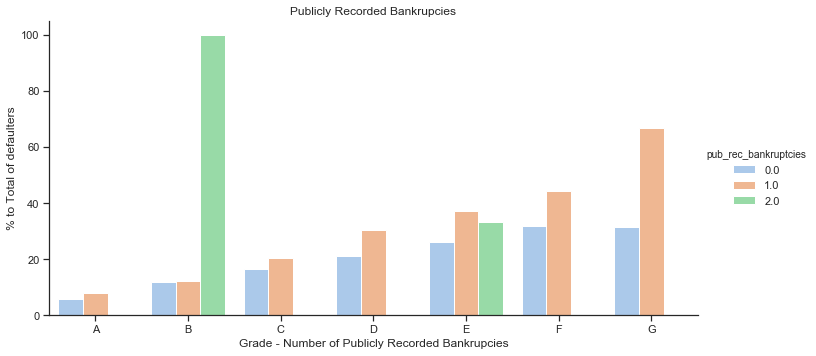

In [168]:
plt.figure(figsize=(16,16)) 
ax = sns.catplot(x="grade",hue="pub_rec_bankruptcies",y="percent_to_total", data=defaulters_gb_grd_prb_sum,kind="bar",aspect=2)
plt.title('Publicly Recorded Bankrupcies')
plt.xlabel('Grade - Number of Publicly Recorded Bankrupcies')
plt.ylabel('% to Total of defaulters')


#### Here it can be seen that across almost all grades, higher Number of public record bankruptcies, the percantage of defaulters in more.

In [169]:
defaulters_gb_prb_sum = loans.groupby(['pub_rec_bankruptcies'])['is_defaulter'].sum().to_frame("count")#.rename("count")
gb_prb_sum = loans.groupby(['pub_rec_bankruptcies']).id.count().to_frame("count")
defaulters_gb_prb_sum['percent_to_total'] = round(defaulters_gb_prb_sum.divide(gb_prb_sum, fill_value=0)*100,2)
#percent_to_total_gb_grade_prb.rename(columns={'count': 'percent_to_total'}, inplace=True)
defaulters_gb_prb_sum.reset_index(inplace=True)
defaulters_gb_prb_sum.head()

pub_rec_bankruptcies   count  percent_to_total
0                  0.0  4944.0              14.0
1                  1.0   335.0              21.9
2                  2.0     2.0              40.0

Text(12.085, 0.5, '% to Total of defaulters')

<Figure size 1152x1152 with 0 Axes>

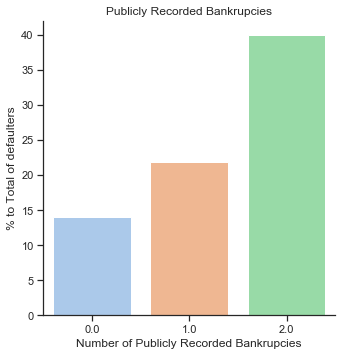

In [170]:
plt.figure(figsize=(16,16)) 
ax = sns.catplot(x="pub_rec_bankruptcies",y="percent_to_total", data=defaulters_gb_prb_sum,kind="bar")
plt.title('Publicly Recorded Bankrupcies')
plt.xlabel('Number of Publicly Recorded Bankrupcies')
plt.ylabel('% to Total of defaulters')


#### Overall as well defaulter rate is increasing with increase in the number of Publicly Recorded Bankrupcies.

## 2. verification_status
#### Effect of verification_status values on defaulter % across grades of loans.

In [171]:
defaulters_gb_grd_vstatus_sum = loans.groupby(['grade', 'verification_status'])['is_defaulter'].sum().to_frame("count")
gb_grd_vstatus_sum = loans.groupby(['grade', 'verification_status']).id.count().to_frame("count")
defaulters_gb_grd_vstatus_sum['percent_to_total'] = round(defaulters_gb_grd_vstatus_sum.divide(gb_grd_vstatus_sum, fill_value=0)*100,2)
defaulters_gb_grd_vstatus_sum.reset_index(inplace=True)
defaulters_gb_grd_vstatus_sum.head()

grade verification_status  count  percent_to_total
0     A        Not Verified  286.0              5.90
1     A     Source Verified  133.0              5.38
2     A            Verified  133.0              6.05
3     B        Not Verified  561.0             11.24
4     B     Source Verified  342.0             12.17

Text(30.82967228732639, 0.5, '% to Total of defaulters')

<Figure size 3600x1152 with 0 Axes>

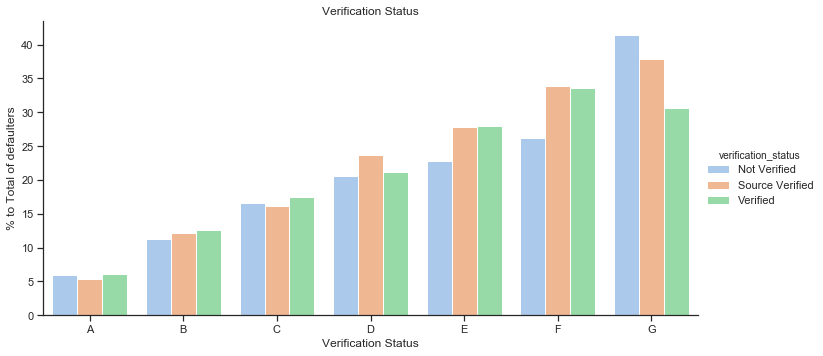

In [172]:
plt.figure(figsize=(50,16)) 
ax = sns.catplot(x="grade",y="percent_to_total",hue="verification_status", data=defaulters_gb_grd_vstatus_sum,kind="bar",aspect=2)
plt.title('Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('% to Total of defaulters')

#### Across grades verification status does not show any consistent increase or decrease in defaulter %.

In [173]:
defaulters_gb_vstatus_sum = loans.groupby(['verification_status'])['is_defaulter'].sum().to_frame("count")
gb_vstatus_sum = loans.groupby(['verification_status']).id.count().to_frame("count")
defaulters_gb_vstatus_sum['percent_to_total'] = round(defaulters_gb_vstatus_sum.divide(gb_vstatus_sum, fill_value=0)*100,2)
defaulters_gb_vstatus_sum.reset_index(inplace=True)
defaulters_gb_vstatus_sum.head()

verification_status   count  percent_to_total
0        Not Verified  1931.0             12.39
1     Source Verified  1396.0             14.70
2            Verified  1954.0             16.60

Text(12.085, 0.5, '% to Total of defaulters')

<Figure size 3600x1152 with 0 Axes>

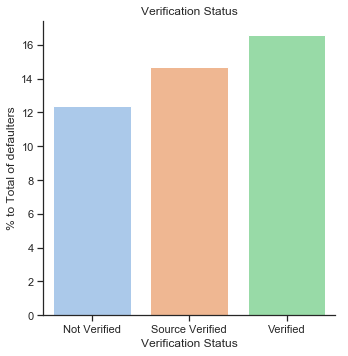

In [174]:
plt.figure(figsize=(50,16)) 
ax = sns.catplot(y="percent_to_total",x="verification_status", data=defaulters_gb_vstatus_sum,kind="bar")
plt.title('Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('% to Total of defaulters')

#### Overall there is a 2% increase in defaulter % for each verification status from Not Verified to Source Verified to Verified.

## 3. home_ownership
#### Effect of different types of home_ownership on defaulter % across grades of loans.

In [175]:
defaulters_gb_grd_hown_sum = loans.groupby(['grade', 'home_ownership'])['is_defaulter'].sum().to_frame("count")
gb_grd_hown_sum = loans.groupby(['grade', 'home_ownership']).id.count().to_frame("count")
defaulters_gb_grd_hown_sum['percent_to_total'] = round(defaulters_gb_grd_hown_sum.divide(gb_grd_hown_sum, fill_value=0)*100,2)
defaulters_gb_grd_hown_sum.reset_index(inplace=True)
defaulters_gb_grd_hown_sum.head()

grade home_ownership  count  percent_to_total
0     A       MORTGAGE  242.0              4.95
1     A          OTHER    2.0              8.33
2     A            OWN   44.0              5.86
3     A           RENT  264.0              6.85
4     B       MORTGAGE  556.0             11.59

Text(30.065892990451395, 0.5, '% to Total of defaulters')

<Figure size 3600x1152 with 0 Axes>

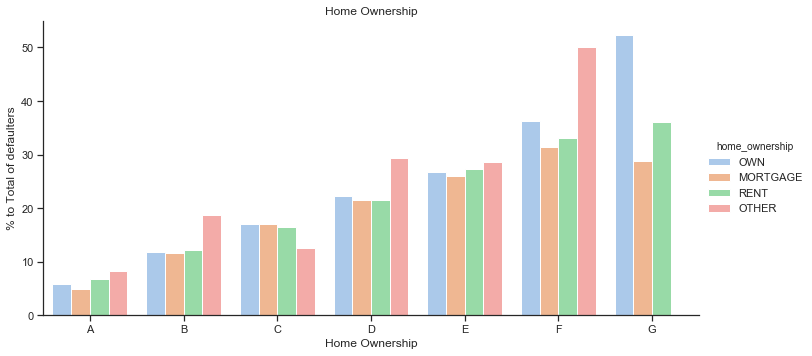

In [176]:
plt.figure(figsize=(50,16)) 
ax = sns.catplot(x="grade",y="percent_to_total",hue="home_ownership",hue_order=['OWN','MORTGAGE','RENT','OTHER'],data=defaulters_gb_grd_hown_sum,kind="bar",aspect=2)
plt.title('Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('% to Total of defaulters')

#### There is no consistent increase, decrease in defaulter % for home ownership types across grades.

In [177]:
defaulters_gb_hown_sum = loans.groupby(['home_ownership'])['is_defaulter'].sum().to_frame("count")
gb_hown_sum = loans.groupby(['home_ownership']).id.count().to_frame("count")
defaulters_gb_hown_sum['percent_to_total'] = round(defaulters_gb_hown_sum.divide(gb_hown_sum, fill_value=0)*100,2)
defaulters_gb_hown_sum.reset_index(inplace=True)
defaulters_gb_hown_sum.head()

home_ownership   count  percent_to_total
0       MORTGAGE  2199.0             13.46
1          OTHER    18.0             18.37
2            OWN   387.0             14.29
3           RENT  2677.0             15.13

Text(2.960000000000001, 0.5, '% to Total of defaulters')

<Figure size 3600x1152 with 0 Axes>

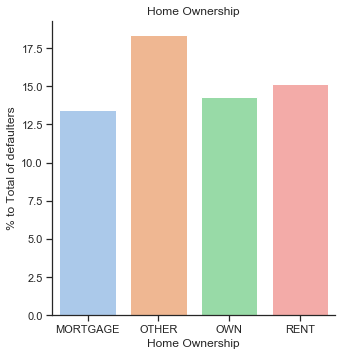

In [178]:
plt.figure(figsize=(50,16)) 
ax = sns.catplot(x="home_ownership",y="percent_to_total",data=defaulters_gb_hown_sum,kind="bar")
plt.title('Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('% to Total of defaulters')

Overall RENT and OTHER Home Ownership types have slightly higher defaulter % compared to the OWN and MORTGAGE.

## 4. term
#### Effect of term of loan of defaulter % across different grades

In [179]:
defaulters_gb_grd_term_sum = loans.groupby(['grade', 'term'])['is_defaulter'].sum().to_frame("count")
gb_grd_term_sum = loans.groupby(['grade', 'term']).id.count().to_frame("count")
defaulters_gb_grd_term_sum['percent_to_total'] = round(defaulters_gb_grd_term_sum.divide(gb_grd_term_sum, fill_value=0)*100,2)
defaulters_gb_grd_term_sum.reset_index(inplace=True)
defaulters_gb_grd_term_sum.head()

grade        term  count  percent_to_total
0     A   36 months  517.0              5.66
1     A   60 months   35.0              9.21
2     B   36 months  904.0             10.18
3     B   60 months  422.0             18.57
4     C   36 months  771.0             14.15

Text(29.38697805989583, 0.5, '% to Total of defaulters')

<Figure size 3600x1152 with 0 Axes>

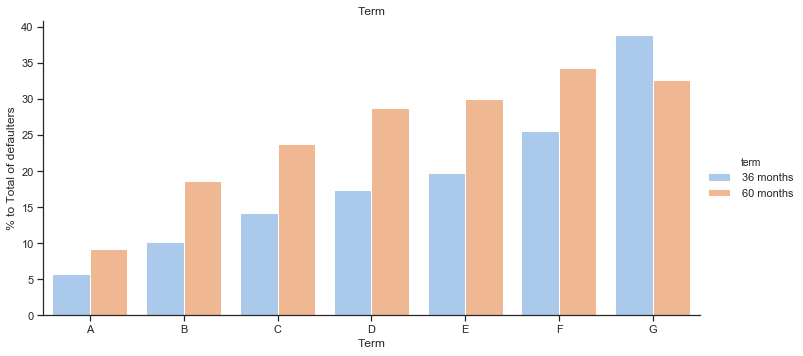

In [180]:
plt.figure(figsize=(50,16)) 
ax = sns.catplot(x="grade",y="percent_to_total",hue="term",data=defaulters_gb_grd_term_sum,kind="bar",aspect=2)
plt.title('Term')
plt.xlabel('Term')
plt.ylabel('% to Total of defaulters')

#### With term it can be seen that 60 months term has higher % of defaulters compared to 36 months except for grade G. 
#### This could be for obvious reasons that more no of months can cause more people to default their payments at the later stages.

In [181]:
defaulters_gb_term_sum = loans.groupby(['term'])['is_defaulter'].sum().to_frame("count")
gb_term_sum = loans.groupby(['term']).id.count().to_frame("count")
defaulters_gb_term_sum['percent_to_total'] = round(defaulters_gb_term_sum.divide(gb_term_sum, fill_value=0)*100,2)
defaulters_gb_term_sum.reset_index(inplace=True)
defaulters_gb_term_sum.head()

term   count  percent_to_total
0   36 months  2955.0             10.71
1   60 months  2326.0             25.13

Text(12.21, 0.5, '% to Total of defaulters')

<Figure size 3600x1152 with 0 Axes>

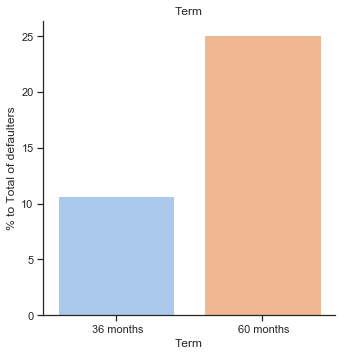

In [182]:
plt.figure(figsize=(50,16)) 
ax = sns.catplot(y="percent_to_total",x="term",data=defaulters_gb_term_sum,kind="bar")
plt.title('Term')
plt.xlabel('Term')
plt.ylabel('% to Total of defaulters')

#### Overall also there is almost 15% difference in the percentage of defaulters in 36 months and 60 months terms with 60 months having more percentage of defaulters.

## 5. emp_length
#### Effect of length of employment on defaulter % across different grades

In [183]:
defaulters_gb_grd_emplength_sum = loans.groupby(['grade', 'emp_length'])['is_defaulter'].sum().to_frame("count")
gb_grd_emplength_sum = loans.groupby(['grade', 'emp_length']).id.count().to_frame("count")
defaulters_gb_grd_emplength_sum['percent_to_total'] = round(defaulters_gb_grd_emplength_sum.divide(gb_grd_emplength_sum, fill_value=0)*100,2)
defaulters_gb_grd_emplength_sum.reset_index(inplace=True)
defaulters_gb_grd_emplength_sum.head()

grade emp_length  count  percent_to_total
0     A     1 year   48.0              6.58
1     A  10+ years  140.0              6.21
2     A    2 years   50.0              4.97
3     A    3 years   56.0              5.61
4     A    4 years   43.0              5.21

Text(26.994368692129626, 0.5, '% to Total of defaulters')

<Figure size 3600x2160 with 0 Axes>

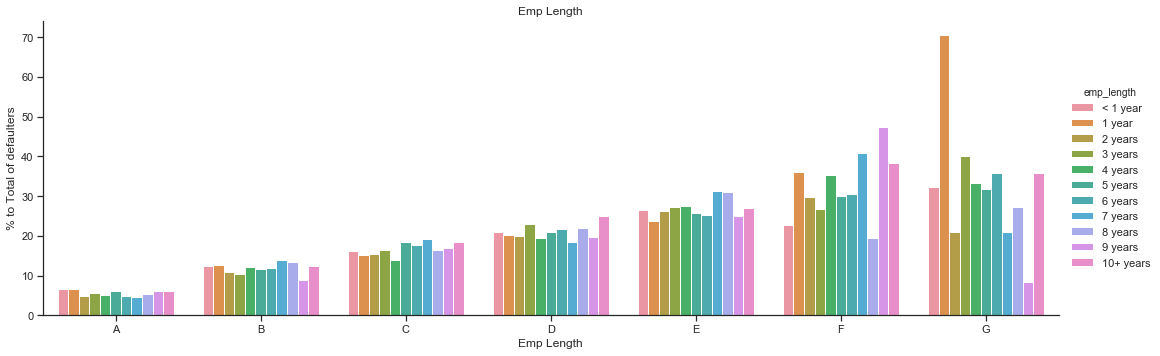

In [184]:
plt.figure(figsize=(50,30)) 
ax = sns.catplot(x="grade",y="percent_to_total",hue="emp_length",hue_order=['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years', '10+ years'],data=defaulters_gb_grd_emplength_sum,kind="bar",aspect=3)
plt.title('Emp Length')
plt.xlabel('Emp Length')
plt.ylabel('% to Total of defaulters')

#### Emp Length does not have any increasig or decreasing effect on defaulter% across all grades.

In [185]:
#### Lets also bin emp_length into 

In [186]:
# using regular expression to extract numeric values from the string
import re
loans['emp_length_num'] = loans['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
loans['emp_length_num'] = loans['emp_length_num'].apply(lambda x: pd.to_numeric(x))

In [187]:
# binning the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

loans['emp_length_bin'] = loans['emp_length_num'].apply(lambda x: emp_length(x))

In [188]:
defaulters_gb_grd_emp_length_bin_sum = loans.groupby(['grade', 'emp_length_bin'])['is_defaulter'].sum().to_frame("count")
gb_grd_emp_length_bin_sum = loans.groupby(['grade', 'emp_length_bin']).id.count().to_frame("count")
defaulters_gb_grd_emp_length_bin_sum['percent_to_total'] = round(defaulters_gb_grd_emp_length_bin_sum.divide(gb_grd_emp_length_bin_sum, fill_value=0)*100,2)
defaulters_gb_grd_emp_length_bin_sum.reset_index(inplace=True)
defaulters_gb_grd_emp_length_bin_sum.head()

grade emp_length_bin  count  percent_to_total
0     A         expert  182.0              6.08
1     A        fresher  125.0              6.62
2     A         junior  106.0              5.29
3     A         senior  139.0              5.28
4     B         expert  400.0             12.21

Text(28.50099407552083, 0.5, '% to Total of defaulters')

<Figure size 3600x1152 with 0 Axes>

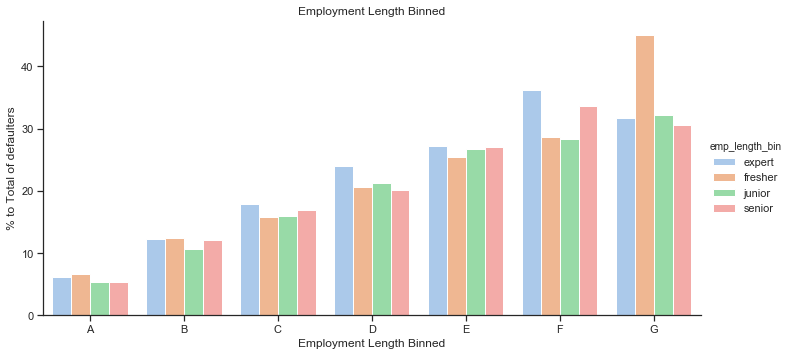

In [189]:
plt.figure(figsize=(50,16)) 
ax = sns.catplot(x="grade",y="percent_to_total",hue="emp_length_bin",data=defaulters_gb_grd_emp_length_bin_sum,kind="bar",aspect=2)
plt.title('Employment Length Binned')
plt.xlabel('Employment Length Binned')
plt.ylabel('% to Total of defaulters')

In [190]:
defaulters_gb_emp_length_bin_sum = loans.groupby(['emp_length_bin'])['is_defaulter'].sum().to_frame("count")
gb_emp_length_bin_sum = loans.groupby(['emp_length_bin']).id.count().to_frame("count")
defaulters_gb_emp_length_bin_sum['percent_to_total'] = round(defaulters_gb_emp_length_bin_sum.divide(gb_emp_length_bin_sum, fill_value=0)*100,2)
defaulters_gb_emp_length_bin_sum.reset_index(inplace=True)
defaulters_gb_emp_length_bin_sum.head()

emp_length_bin   count  percent_to_total
0         expert  1659.0             15.10
1        fresher  1054.0             14.21
2         junior  1105.0             13.54
3         senior  1463.0             14.23

Text(12.085, 0.5, '% to Total of defaulters')

<Figure size 3600x1152 with 0 Axes>

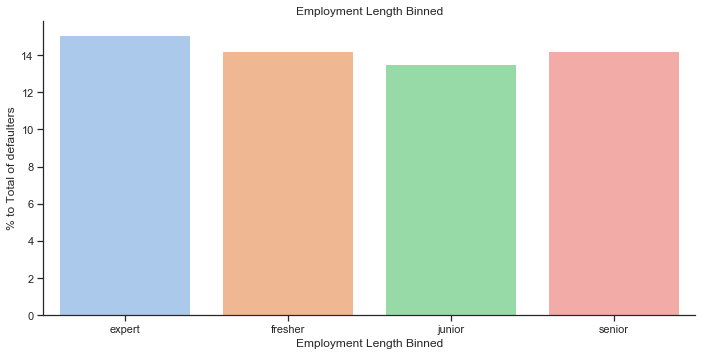

In [191]:
plt.figure(figsize=(50,16)) 
ax = sns.catplot(x="emp_length_bin",y="percent_to_total",data=defaulters_gb_emp_length_bin_sum,kind="bar",aspect=2)
plt.title('Employment Length Binned')
plt.xlabel('Employment Length Binned')
plt.ylabel('% to Total of defaulters')

#### Even after binning into 4 categories of Fresher, Junior, Senior and Expert, defaulter percentages across all these categories overall and across grades do not show any consistent increase or decrease.

## 6. grade and sub_grade
#### In all of the above graphs we could notice that from A to G grades, G clearly has more % of defaulters.
#### If we look at the lending club page below which gives info on how these grades and subgrades are assigned, based on   FICO score, credit attributes, and other application data, model rank is calculated and thus grades and subgrades are assigned.

#### https://www.lendingclub.com/foliofn/rateDetail.action

#### Grade against defaulter %

In [192]:
defaulters_gb_grd_sum = loans.groupby(['grade'])['is_defaulter'].sum().to_frame("count")
gb_grd_sum = loans.groupby(['grade']).id.count().to_frame("count")
defaulters_gb_grd_sum['percent_to_total'] = round(defaulters_gb_grd_sum.divide(gb_grd_sum, fill_value=0)*100,2)
defaulters_gb_grd_sum.reset_index(inplace=True)
defaulters_gb_grd_sum.head()

grade   count  percent_to_total
0     A   552.0              5.80
1     B  1326.0             11.89
2     C  1254.0             16.75
3     D  1052.0             21.61
4     E   690.0             26.69

<Figure size 7200x1152 with 0 Axes>

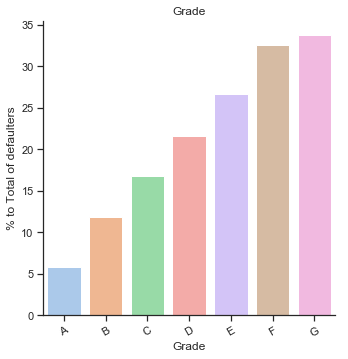

In [193]:
plt.figure(figsize=(100,16)) 
ax = sns.catplot(x="grade",y="percent_to_total",data=defaulters_gb_grd_sum,kind="bar")
plt.title('Grade')
plt.xlabel('Grade')
plt.ylabel('% to Total of defaulters')
ax.set_xticklabels(rotation=30)

#### There is a clear increase in defaulter % (approx 30%) from grades A to G 

#### SubGrade against defaulter %

In [194]:
defaulters_gb_subgrd_sum = loans.groupby(['sub_grade'])['is_defaulter'].sum().to_frame("count")
gb_subgrd_sum = loans.groupby(['sub_grade']).id.count().to_frame("count")
defaulters_gb_subgrd_sum['percent_to_total'] = round(defaulters_gb_subgrd_sum.divide(gb_subgrd_sum, fill_value=0)*100,2)
defaulters_gb_subgrd_sum.reset_index(inplace=True)
defaulters_gb_subgrd_sum.head()

sub_grade  count  percent_to_total
0        A1   24.0              2.31
1        A2   67.0              4.75
2        A3   87.0              5.11
3        A4  167.0              6.05
4        A5  207.0              7.96

<Figure size 7200x1152 with 0 Axes>

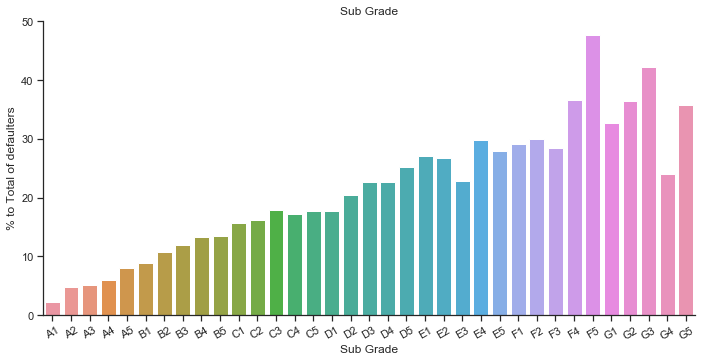

In [195]:
plt.figure(figsize=(100,16)) 
ax = sns.catplot(x="sub_grade",y="percent_to_total",data=defaulters_gb_subgrd_sum,kind="bar", aspect=2)
plt.title('Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('% to Total of defaulters')
ax.set_xticklabels(rotation=30)

#### Clearly % of defaulters to total is increasing from A1 to higher grades. The grades have been assigned as per Base Risk with increasing risk thus more % of defaulters from A1 to G5.

## 7. addr_state

In [196]:
loans.addr_state = loans.addr_state.str.strip()
#loans.rename(columns={'addr_state': 'State'}, inplace=True)

#### Plotting a choropleth map to check for a yearly statewise defaulter %.

In [197]:
addr_state_total = pd.pivot_table(loans, values='id', index='addr_state', aggfunc='count',fill_value=0)
addr_state_total.rename(columns={'id': 'total'}, inplace=True)
addr_state_total.head()

total
addr_state       
AK             75
AL            411
AR            224
AZ            794
CA           6685

In [198]:
addr_state_total_defaulters = pd.pivot_table(loans, values='is_defaulter', index='addr_state', aggfunc='sum',fill_value=0)
addr_state_total_defaulters.rename(columns={'is_defaulter': 'total'}, inplace=True)
addr_state_total_defaulters.head()

total
addr_state       
AK             15
AL             51
AR             26
AZ            114
CA           1051

In [199]:
addr_state_percent_to_total_defaulters = (addr_state_total_defaulters.divide(addr_state_total,fill_value=0)*100).round(2)
addr_state_percent_to_total_defaulters.fillna(0,inplace=True)
addr_state_percent_to_total_defaulters.reset_index(inplace=True)
addr_state_percent_to_total_defaulters.head()

addr_state  total
0         AK  20.00
1         AL  12.41
2         AR  11.61
3         AZ  14.36
4         CA  15.72

In [200]:
addr_state_percent_to_total_defaulters['Hover_text'] = 'State : ' + addr_state_percent_to_total_defaulters['addr_state'] + '<br>' + \
'Percentage of Defaulters : ' + addr_state_percent_to_total_defaulters['total'].apply(str)


In [201]:
addr_state_percent_to_total_defaulters.head()

addr_state  total                                      Hover_text
0         AK  20.00   State : AK<br>Percentage of Defaulters : 20.0
1         AL  12.41  State : AL<br>Percentage of Defaulters : 12.41
2         AR  11.61  State : AR<br>Percentage of Defaulters : 11.61
3         AZ  14.36  State : AZ<br>Percentage of Defaulters : 14.36
4         CA  15.72  State : CA<br>Percentage of Defaulters : 15.72

In [202]:
type(addr_state_percent_to_total_defaulters)

pandas.core.frame.DataFrame

In [205]:
# referred  https://plot.ly/python/choropleth-maps/ to plot the below
#pip install plotly==4.0.0 in cmd, or conda install -c plotly plotly=4.0.0 for conda, for the import to work need to install plotly in cmd or conda first 
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objects as go
init_notebook_mode()
fig = go.Figure(data=go.Choropleth(
    locations=addr_state_percent_to_total_defaulters['addr_state'],
    z=addr_state_percent_to_total_defaulters['total'],
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=addr_state_percent_to_total_defaulters['Hover_text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Percentage of defaulters"
))

fig.update_layout(
    title_text='Percentage of defaulters to Total defaulters per State<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

#### We see that some states like Nevada, Alaska, Tennessee have comparatively higher no of defaulters.

## Now moving ahead with analysis of continuous variables and their relationship with defaulter %.

#### Probing loan_amnt, funded_amnt, funded_amnt_inv


## 1. loan_amnt
#### The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [206]:
loans.loc[loans.loan_amnt!=loans.funded_amnt,['loan_amnt','funded_amnt','funded_amnt_inv']].head(5)

loan_amnt  funded_amnt  funded_amnt_inv
61      17500         8950           8925.0
66      12500         8925           8925.0
70      20975        13575          13550.0
77       7250         7200           7175.0
80      35000        22075          22050.0

In [207]:
loans.loc[loans.funded_amnt>loans.loan_amnt,['loan_amnt','funded_amnt','funded_amnt_inv']].head(5)

Empty DataFrame
Columns: [loan_amnt, funded_amnt, funded_amnt_inv]
Index: []

In [208]:
loans.loc[loans.funded_amnt!=loans.funded_amnt_inv,['loan_amnt','funded_amnt','funded_amnt_inv']].head(5)

loan_amnt  funded_amnt  funded_amnt_inv
0        5000         5000       4975.00000
9        5375         5375       5350.00000
20      20250        20250      19142.16108
26      15000        15000       8725.00000
51      25600        25600      25350.00000

In [209]:
loans.loc[loans.funded_amnt<loans.funded_amnt_inv,['loan_amnt','funded_amnt','funded_amnt_inv']].head(5)

Empty DataFrame
Columns: [loan_amnt, funded_amnt, funded_amnt_inv]
Index: []

#### So looking at the data it can be seen that loan_amont has always been higher than the other 2 and never been reduced by credit department in the future at least for the data provided.


#### Effect of Loan Amount on loan_status

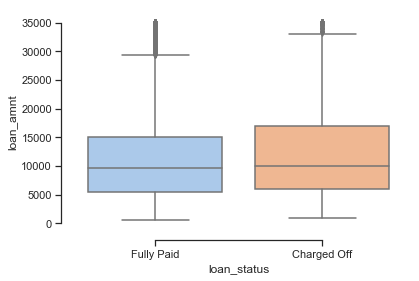

In [210]:
sns.set(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="loan_status", y="loan_amnt",data=loans)
sns.despine(offset=10, trim=True)

#### No any insights here except that Fully paid loans have more outliers in terms of higher loan amounts compared to Charged off loans.

The easiest way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.

Let's bin the loan amount variable into small, medium, high, very high.

In [211]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
loans['loan_amnt_bin'] = loans['loan_amnt'].apply(lambda x: loan_amount(x))


In [212]:
loans['loan_amnt_bin'].value_counts()

medium       19783
high          7436
low           6940
very high     2688
Name: loan_amnt_bin, dtype: int64

In [213]:
defaulters_gb_grd_loan_amnt_bin_sum = loans.groupby(['grade', 'loan_amnt_bin'])['is_defaulter'].sum().to_frame("count")
gb_grd_loan_amnt_bin_sum = loans.groupby(['grade', 'loan_amnt_bin']).id.count().to_frame("count")
defaulters_gb_grd_loan_amnt_bin_sum['percent_to_total'] = round(defaulters_gb_grd_loan_amnt_bin_sum.divide(gb_grd_loan_amnt_bin_sum, fill_value=0)*100,2)
defaulters_gb_grd_loan_amnt_bin_sum.reset_index(inplace=True)
defaulters_gb_grd_loan_amnt_bin_sum.head()

grade loan_amnt_bin  count  percent_to_total
0     A          high   47.0              4.45
1     A           low  150.0              6.87
2     A        medium  349.0              5.69
3     A     very high    6.0              4.03
4     B          high  286.0             11.97

Text(28.73352243923611, 0.5, '% to Total of defaulters')

<Figure size 3600x1152 with 0 Axes>

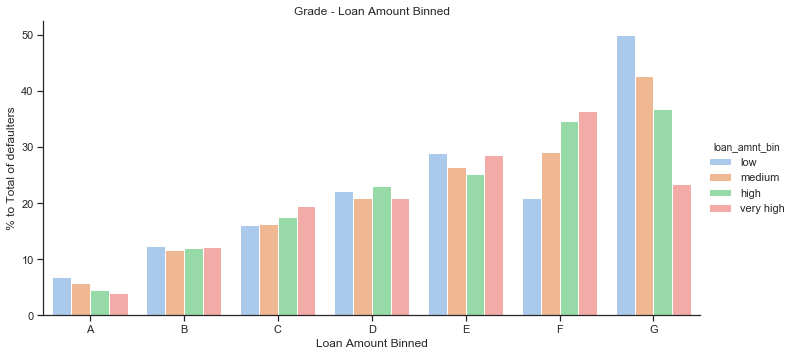

In [214]:
plt.figure(figsize=(50,16)) 
ax = sns.catplot(x="grade",y="percent_to_total",hue="loan_amnt_bin",hue_order=['low','medium','high','very high'],data=defaulters_gb_grd_loan_amnt_bin_sum,kind="bar",aspect=2)
plt.title('Grade - Loan Amount Binned')
plt.xlabel('Loan Amount Binned')
plt.ylabel('% to Total of defaulters')

In [215]:
defaulters_gb_loan_amnt_bin_sum = loans.groupby(['loan_amnt_bin'])['is_defaulter'].sum().to_frame("count")
gb_loan_amnt_bin_sum = loans.groupby(['loan_amnt_bin']).id.count().to_frame("count")
defaulters_gb_loan_amnt_bin_sum['percent_to_total'] = round(defaulters_gb_loan_amnt_bin_sum.divide(gb_loan_amnt_bin_sum, fill_value=0)*100,2)
defaulters_gb_loan_amnt_bin_sum.reset_index(inplace=True)
defaulters_gb_loan_amnt_bin_sum.head()

loan_amnt_bin   count  percent_to_total
0          high  1238.0             16.65
1           low   923.0             13.30
2        medium  2569.0             12.99
3     very high   551.0             20.50

C:\Users\Isha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(12.21, 0.5, '% to Total of defaulters')

<Figure size 3600x1152 with 0 Axes>

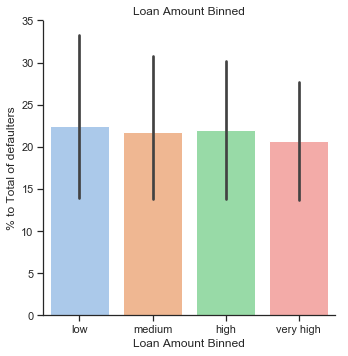

In [216]:
plt.figure(figsize=(50,16)) 
ax = sns.catplot(x="loan_amnt_bin",y="percent_to_total",order=['low','medium','high','very high'],data=defaulters_gb_grd_loan_amnt_bin_sum,kind="bar")
plt.title('Loan Amount Binned')
plt.xlabel('Loan Amount Binned')
plt.ylabel('% to Total of defaulters')

#### Even after Binning, there is no consistent increase/decrease in defaulter % for bins from low to very high.

## 2. funded_amnt
#### The total amount committed to that loan at that point in time.

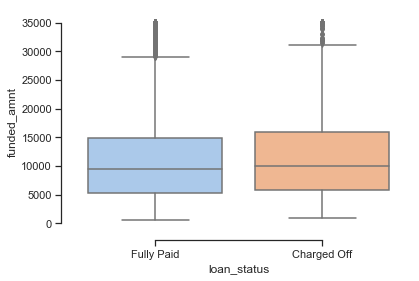

In [217]:
sns.set(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="loan_status", y="funded_amnt",data=loans)
sns.despine(offset=10, trim=True)

In [218]:
loans['funded_amnt_bin'] = loans['funded_amnt'].apply(lambda x: loan_amount(x))

In [219]:
loans['funded_amnt_bin'].value_counts()

medium       20247
high          7285
low           7031
very high     2284
Name: funded_amnt_bin, dtype: int64

In [220]:
defaulters_gb_grd_funded_amnt_bin_sum = loans.groupby(['grade', 'funded_amnt_bin'])['is_defaulter'].sum().to_frame("count")
gb_grd_funded_amnt_bin_sum = loans.groupby(['grade', 'funded_amnt_bin']).id.count().to_frame("count")
defaulters_gb_grd_funded_amnt_bin_sum['percent_to_total'] = round(defaulters_gb_grd_funded_amnt_bin_sum.divide(gb_grd_funded_amnt_bin_sum, fill_value=0)*100,2)
defaulters_gb_grd_funded_amnt_bin_sum.reset_index(inplace=True)
defaulters_gb_grd_funded_amnt_bin_sum.head()

grade funded_amnt_bin  count  percent_to_total
0     A            high   38.0              4.30
1     A             low  152.0              6.84
2     A          medium  356.0              5.68
3     A       very high    6.0              4.17
4     B            high  278.0             12.01

Text(28.950775217013884, 0.5, '% to Total of defaulters')

<Figure size 3600x1152 with 0 Axes>

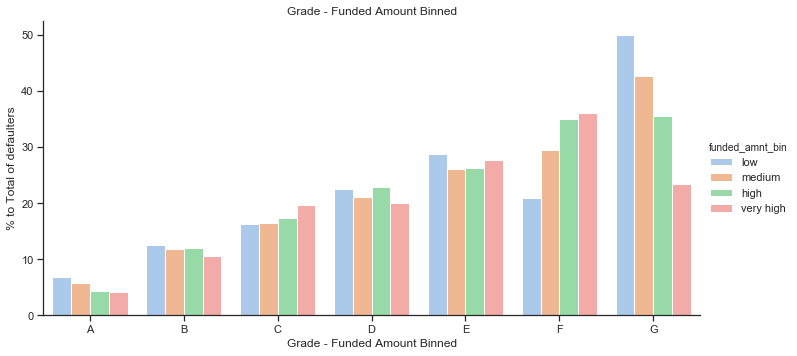

In [221]:
plt.figure(figsize=(50,16)) 
ax = sns.catplot(x="grade",y="percent_to_total",hue="funded_amnt_bin",hue_order=['low','medium','high','very high'],data=defaulters_gb_grd_funded_amnt_bin_sum,kind="bar",aspect=2)
plt.title('Grade - Funded Amount Binned')
plt.xlabel('Grade - Funded Amount Binned')
plt.ylabel('% to Total of defaulters')

#### Across grades Binned Funded Amount does not show any increase/decrease in defaulter % across grades.

In [222]:
defaulters_gb_funded_amnt_bin_sum = loans.groupby(['funded_amnt_bin'])['is_defaulter'].sum().to_frame("count")
gb_funded_amnt_bin_sum = loans.groupby(['funded_amnt_bin']).id.count().to_frame("count")
defaulters_gb_funded_amnt_bin_sum['percent_to_total'] = round(defaulters_gb_funded_amnt_bin_sum.divide(gb_funded_amnt_bin_sum, fill_value=0)*100,2)
defaulters_gb_funded_amnt_bin_sum.reset_index(inplace=True)
defaulters_gb_funded_amnt_bin_sum.head()

funded_amnt_bin   count  percent_to_total
0            high  1247.0             17.12
1             low   939.0             13.36
2          medium  2644.0             13.06
3       very high   451.0             19.75

Text(2.960000000000001, 0.5, '% to Total of defaulters')

<Figure size 3600x1152 with 0 Axes>

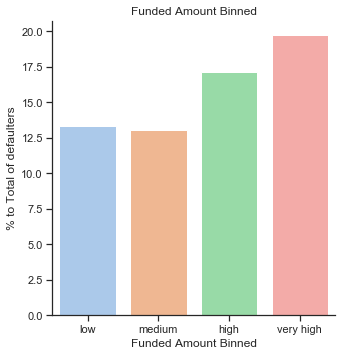

In [223]:
plt.figure(figsize=(50,16)) 
ax = sns.catplot(x="funded_amnt_bin",y="percent_to_total",order=['low','medium','high','very high'],data=defaulters_gb_funded_amnt_bin_sum,kind="bar")
plt.title('Funded Amount Binned')
plt.xlabel('Funded Amount Binned')
plt.ylabel('% to Total of defaulters')

#### Overall, high and very high Funded Amounts have higher defaulter % cmpared to low and medium funded amounts.

## 3. funded_amnt_inv
#### The total amount committed by investors for that loan at that point in time.

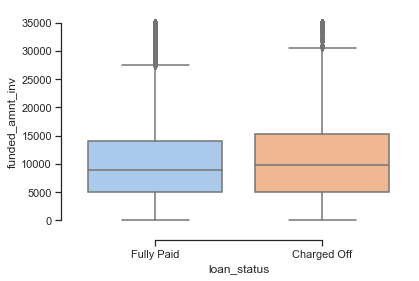

In [224]:
sns.set(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="loan_status", y="funded_amnt_inv",data=loans)
sns.despine(offset=10, trim=True)

In [225]:
loans['funded_amnt_inv_bin'] = loans['funded_amnt_inv'].apply(lambda x: loan_amount(x))

In [226]:
loans['funded_amnt_inv_bin'].value_counts()

medium       20434
low           8419
high          6658
very high     1336
Name: funded_amnt_inv_bin, dtype: int64

In [227]:
defaulters_gb_grd_funded_amnt_inv_bin_sum = loans.groupby(['grade', 'funded_amnt_inv_bin'])['is_defaulter'].sum().to_frame("count")
gb_grd_funded_amnt_inv_bin_sum = loans.groupby(['grade', 'funded_amnt_inv_bin']).id.count().to_frame("count")
defaulters_gb_grd_funded_amnt_inv_bin_sum['percent_to_total'] = round(defaulters_gb_grd_funded_amnt_inv_bin_sum.divide(gb_grd_funded_amnt_inv_bin_sum, fill_value=0)*100,2)
defaulters_gb_grd_funded_amnt_inv_bin_sum.reset_index(inplace=True)
defaulters_gb_grd_funded_amnt_inv_bin_sum.head()

grade funded_amnt_inv_bin  count  percent_to_total
0     A                high   30.0              4.35
1     A                 low  173.0              6.79
2     A              medium  344.0              5.59
3     A           very high    5.0              3.97
4     B                high  242.0             11.65

Text(30.215254275173606, 0.5, '% to Total of defaulters')

<Figure size 3600x1152 with 0 Axes>

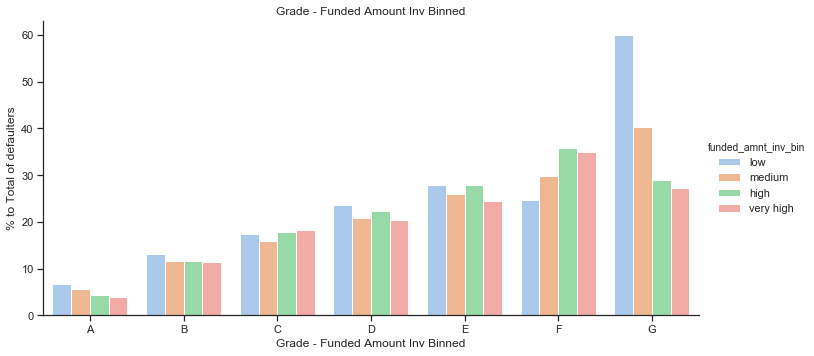

In [228]:
plt.figure(figsize=(50,16)) 
ax = sns.catplot(x="grade",y="percent_to_total",hue="funded_amnt_inv_bin",hue_order=['low','medium','high','very high'],data=defaulters_gb_grd_funded_amnt_inv_bin_sum,kind="bar",aspect=2)
plt.title('Grade - Funded Amount Inv Binned')
plt.xlabel('Grade - Funded Amount Inv Binned')
plt.ylabel('% to Total of defaulters')

#### Across grades Binned Funded Amount Inv does not show any increase/decrease in defaulter % across grades.

In [229]:
defaulters_gb_funded_amnt_inv_bin_sum = loans.groupby(['funded_amnt_inv_bin'])['is_defaulter'].sum().to_frame("count")
gb_funded_amnt_inv_bin_sum = loans.groupby(['funded_amnt_inv_bin']).id.count().to_frame("count")
defaulters_gb_funded_amnt_inv_bin_sum['percent_to_total'] = round(defaulters_gb_funded_amnt_inv_bin_sum.divide(gb_funded_amnt_inv_bin_sum, fill_value=0)*100,2)
defaulters_gb_funded_amnt_inv_bin_sum.reset_index(inplace=True)
defaulters_gb_funded_amnt_inv_bin_sum.head()

funded_amnt_inv_bin   count  percent_to_total
0                high  1180.0             17.72
1                 low  1189.0             14.12
2              medium  2653.0             12.98
3           very high   259.0             19.39

Text(2.960000000000001, 0.5, '% to Total of defaulters')

<Figure size 3600x1152 with 0 Axes>

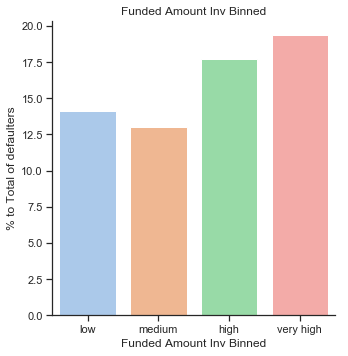

In [230]:
plt.figure(figsize=(50,16)) 
ax = sns.catplot(x="funded_amnt_inv_bin",y="percent_to_total",order=['low','medium','high','very high'],data=defaulters_gb_funded_amnt_inv_bin_sum,kind="bar")
plt.title('Funded Amount Inv Binned')
plt.xlabel('Funded Amount Inv Binned')
plt.ylabel('% to Total of defaulters')

#### Overall, high and very high Funded Amounts Inv have higher defaulter % cmpared to low and medium funded amount inv.

## 4. int_rate

In [231]:
loans['int_rate_num'] = loans['int_rate'].str.replace('%','').astype(float)

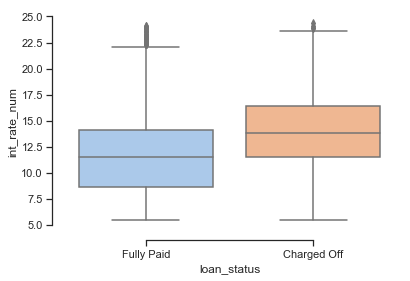

In [232]:
sns.set(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="loan_status", y="int_rate_num",data=loans)
sns.despine(offset=10, trim=True)

#### Fully paid loans have lower interest rates compared to Charged Off loans in terms of overall spread of data.

#### This might also be due to grades A to G have increased risk and thus given higher interest rate.
#### Checking for Boxplot of Subgrade against interest to confirm.

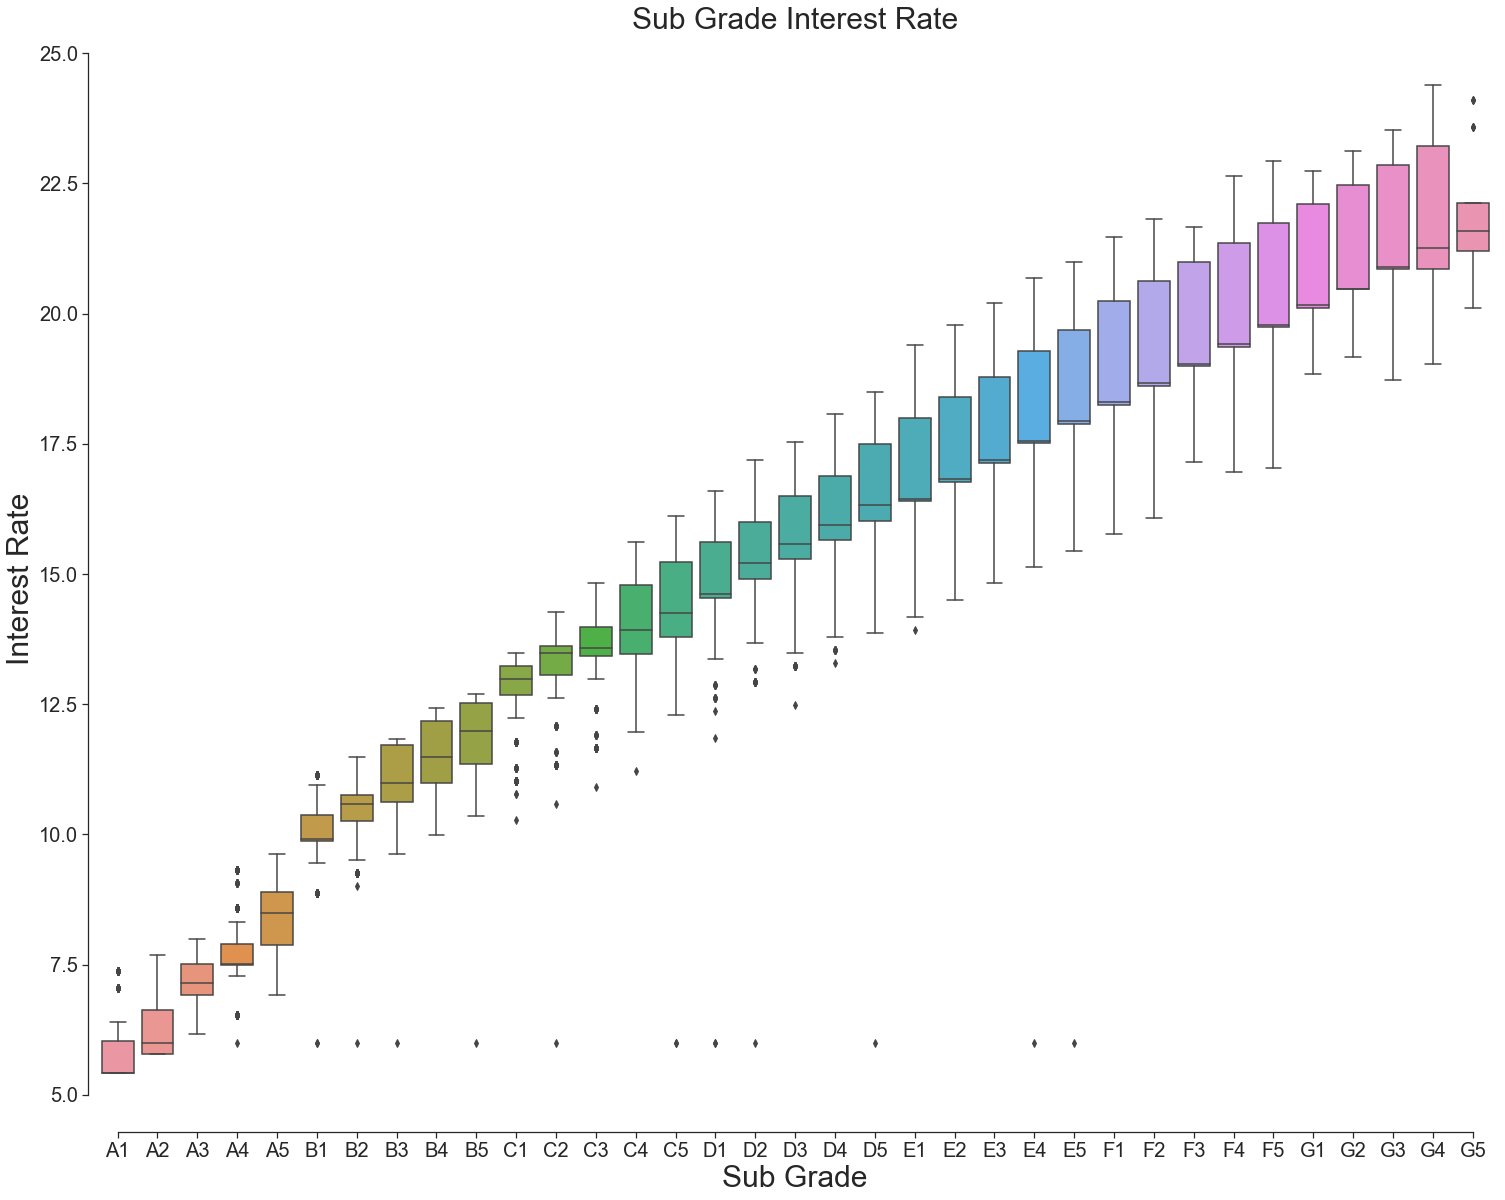

In [233]:
plt.figure(figsize=(25,20)) 
sns.set(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
b =sns.boxplot(x="sub_grade", y="int_rate_num",data=loans,order=['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'])
b.axes.set_title("Sub Grade Interest Rate",fontsize=30)
b.set_xlabel("Sub Grade",fontsize=30)
b.set_ylabel("Interest Rate",fontsize=30)
b.tick_params(labelsize=20)
sns.despine(offset=10, trim=True)

#### As can be seen in above boxplot, from A1 to G5, Int rate trend is increasing.

In [234]:
# lets also convert interest rate to low, medium, high
# binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
loans['int_rate_bin'] = loans['int_rate_num'].apply(lambda x: int_rate(x))

In [235]:
loans['int_rate_bin'].value_counts()

medium    17493
low       11545
high       7809
Name: int_rate_bin, dtype: int64

In [236]:
defaulters_gb_grd_int_rate_bin_sum = loans.groupby(['grade', 'int_rate_bin'])['is_defaulter'].sum().to_frame("count")
gb_grd_int_rate_bin_sum = loans.groupby(['grade', 'int_rate_bin']).id.count().to_frame("count")
defaulters_gb_grd_int_rate_bin_sum['percent_to_total'] = round(defaulters_gb_grd_int_rate_bin_sum.divide(gb_grd_int_rate_bin_sum, fill_value=0)*100,2)
defaulters_gb_grd_int_rate_bin_sum.reset_index(inplace=True)
defaulters_gb_grd_int_rate_bin_sum.head()

grade int_rate_bin   count  percent_to_total
0     A          low   552.0              5.80
1     B          low   184.0              9.12
2     B       medium  1142.0             12.51
3     C         high   124.0             23.01
4     C          low     0.0              0.00

Text(28.354894726562506, 0.5, '% to Total of defaulters')

<Figure size 3600x1152 with 0 Axes>

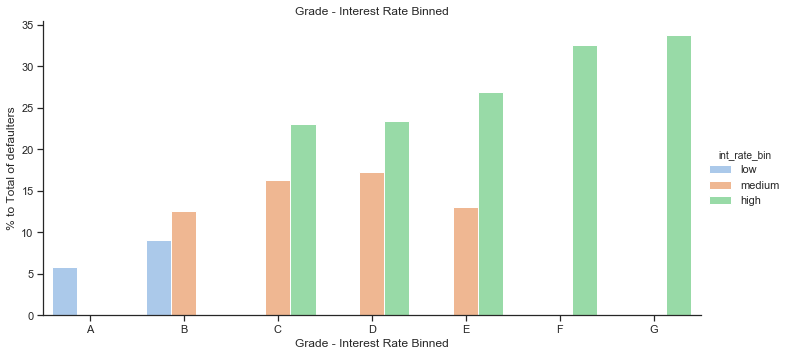

In [237]:
plt.figure(figsize=(50,16)) 
ax = sns.catplot(x="grade",y="percent_to_total",hue="int_rate_bin",hue_order=['low','medium','high'],data=defaulters_gb_grd_int_rate_bin_sum,kind="bar",aspect=2)
plt.title('Grade - Interest Rate Binned')
plt.xlabel('Grade - Interest Rate Binned')
plt.ylabel('% to Total of defaulters')

In [238]:
defaulters_gb_int_rate_bin_sum = loans.groupby(['int_rate_bin'])['is_defaulter'].sum().to_frame("count")
gb_int_rate_bin_sum = loans.groupby(['int_rate_bin']).id.count().to_frame("count")
defaulters_gb_int_rate_bin_sum['percent_to_total'] = round(defaulters_gb_int_rate_bin_sum.divide(gb_int_rate_bin_sum, fill_value=0)*100,2)
defaulters_gb_int_rate_bin_sum.reset_index(inplace=True)
defaulters_gb_int_rate_bin_sum.head()

int_rate_bin   count  percent_to_total
0         high  2029.0             25.98
1          low   736.0              6.38
2       medium  2516.0             14.38

Text(12.21, 0.5, '% to Total of defaulters')

<Figure size 3600x1152 with 0 Axes>

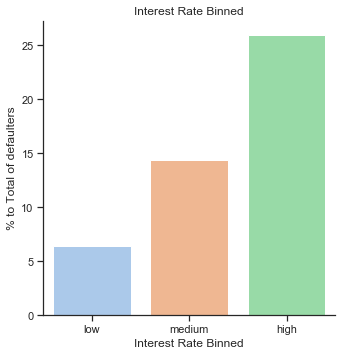

In [239]:
plt.figure(figsize=(50,16)) 
ax = sns.catplot(x="int_rate_bin",y="percent_to_total",order=['low','medium','high'],data=defaulters_gb_int_rate_bin_sum,kind="bar")
plt.title('Interest Rate Binned')
plt.xlabel('Interest Rate Binned')
plt.ylabel('% to Total of defaulters')

#### Here it is very clear across grades and also overall that higher interest rates bins have higher percentage of defaulters.

## 5. installment

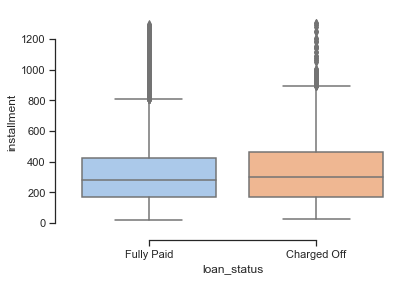

In [240]:
sns.set(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="loan_status", y="installment",data=loans)
sns.despine(offset=10, trim=True)

#### Charged Off have slightly higher installment. 
#### This again would be related to grade and sub_grade.
#### Doing a box plot of sub_grade against installment to confirm this.

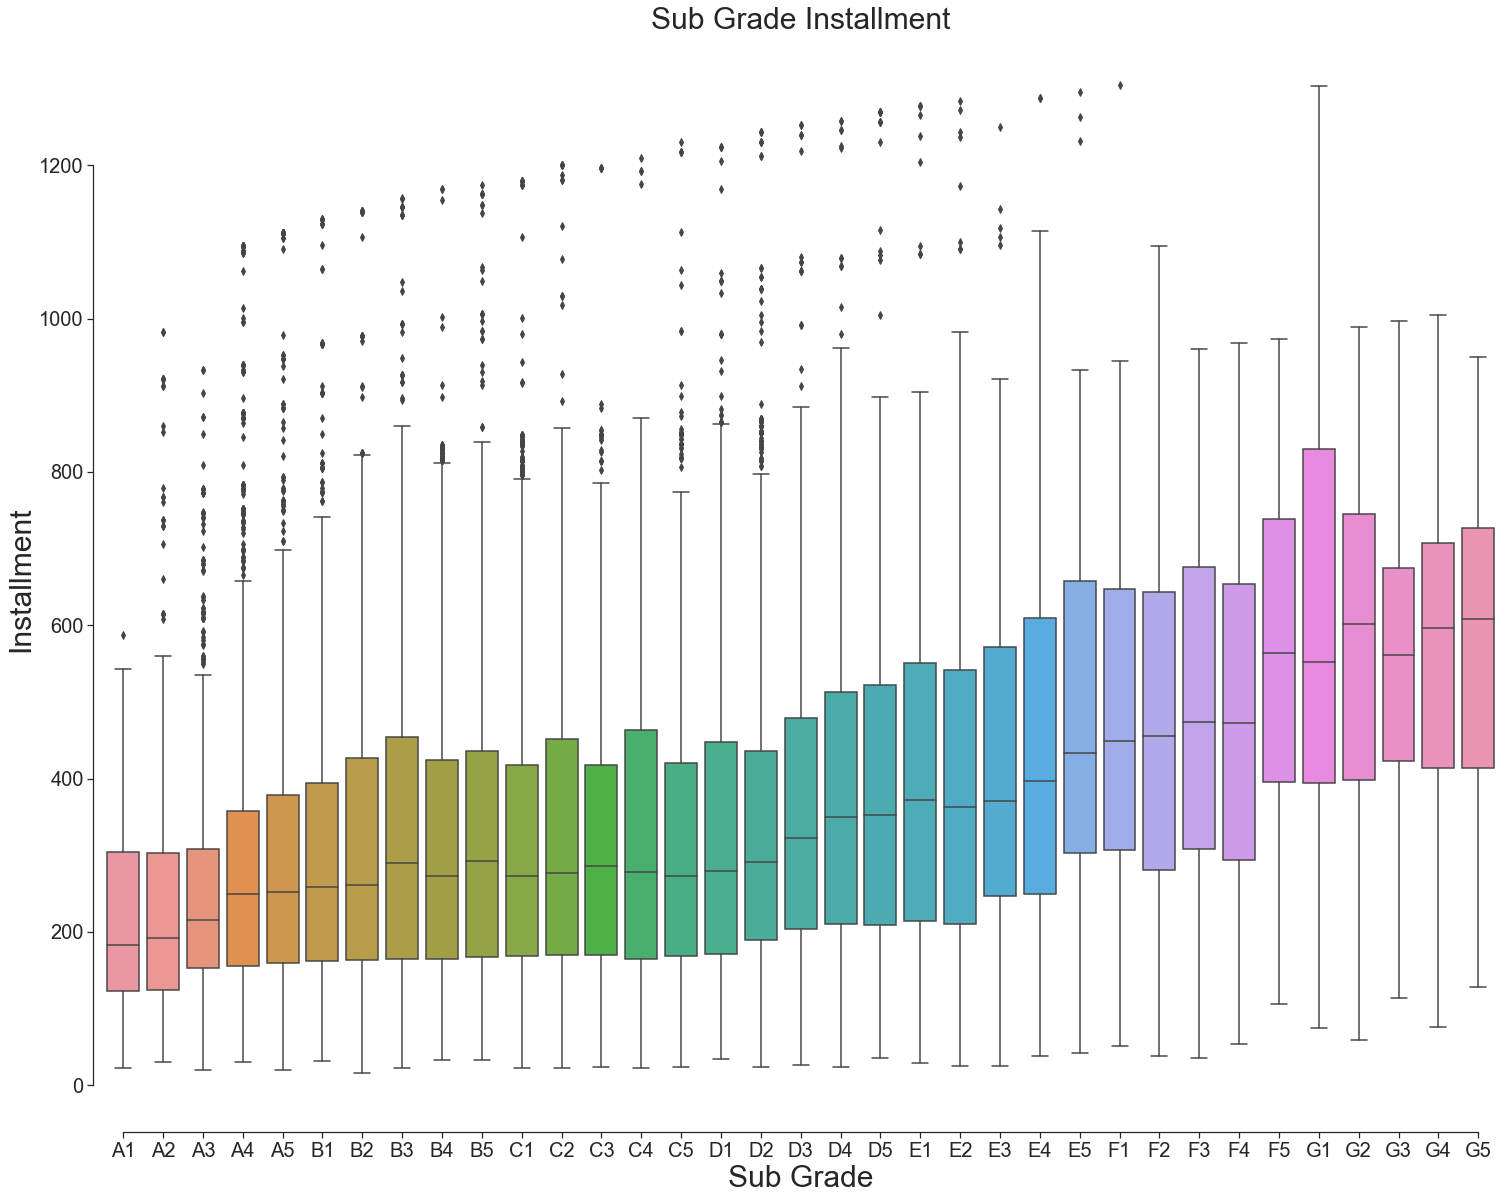

In [241]:
plt.figure(figsize=(25,20)) 
sns.set(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
b =sns.boxplot(x="sub_grade", y="installment",data=loans,order=['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'])
b.axes.set_title("Sub Grade Installment",fontsize=30)
b.set_xlabel("Sub Grade",fontsize=30)
b.set_ylabel("Installment",fontsize=30)
b.tick_params(labelsize=20)
sns.despine(offset=10, trim=True)

#### As seen there is a slight increase in all quantiles for investments with the move from A1 to G5 grades.

In [242]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
loans['installment_bin'] = loans['installment'].apply(lambda x: installment(x))

In [243]:
loans['installment_bin'].value_counts()

medium       14141
low          12293
high          6354
very high     4059
Name: installment_bin, dtype: int64

In [244]:
defaulters_gb_grd_installment_bin_sum = loans.groupby(['grade', 'installment_bin'])['is_defaulter'].sum().to_frame("count")
gb_grd_installment_bin_sum = loans.groupby(['grade', 'installment_bin']).id.count().to_frame("count")
defaulters_gb_grd_installment_bin_sum['percent_to_total'] = round(defaulters_gb_grd_installment_bin_sum.divide(gb_grd_installment_bin_sum, fill_value=0)*100,2)
defaulters_gb_grd_installment_bin_sum.reset_index(inplace=True)
defaulters_gb_grd_installment_bin_sum.head()

grade installment_bin  count  percent_to_total
0     A            high   48.0              4.60
1     A             low  261.0              6.39
2     A          medium  233.0              5.78
3     A       very high   10.0              2.75
4     B            high  213.0             11.46

Text(28.73352243923611, 0.5, '% to Total of defaulters')

<Figure size 3600x1152 with 0 Axes>

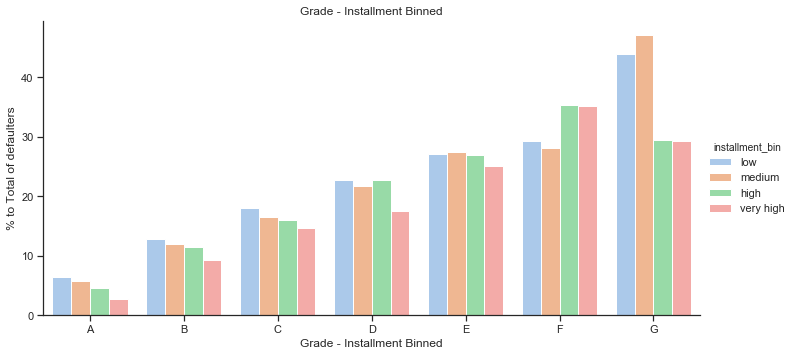

In [245]:
plt.figure(figsize=(50,16)) 
ax = sns.catplot(x="grade",y="percent_to_total",hue="installment_bin",hue_order=['low','medium','high','very high'],data=defaulters_gb_grd_installment_bin_sum,kind="bar",aspect=2)
plt.title('Grade - Installment Binned')
plt.xlabel('Grade - Installment Binned')
plt.ylabel('% to Total of defaulters')

In [246]:
defaulters_gb_installment_bin_sum = loans.groupby(['installment_bin'])['is_defaulter'].sum().to_frame("count")
gb_installment_bin_sum = loans.groupby(['installment_bin']).id.count().to_frame("count")
defaulters_gb_installment_bin_sum['percent_to_total'] = round(defaulters_gb_installment_bin_sum.divide(gb_installment_bin_sum, fill_value=0)*100,2)
defaulters_gb_installment_bin_sum.reset_index(inplace=True)
defaulters_gb_installment_bin_sum.head()

installment_bin   count  percent_to_total
0            high  1004.0             15.80
1             low  1671.0             13.59
2          medium  1950.0             13.79
3       very high   656.0             16.16

Text(12.085, 0.5, '% to Total of defaulters')

<Figure size 3600x1152 with 0 Axes>

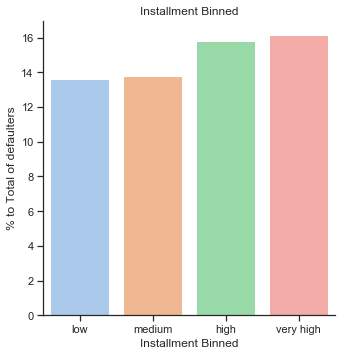

In [247]:
plt.figure(figsize=(50,16)) 
ax = sns.catplot(x="installment_bin",y="percent_to_total",order=['low','medium','high','very high'],data=defaulters_gb_installment_bin_sum,kind="bar")
plt.title('Installment Binned')
plt.xlabel('Installment Binned')
plt.ylabel('% to Total of defaulters')

#### Overall higher installments have higher no of defaulters(approx 2 % increase in defaulter % from low, medium to high and very high binned installments), but when we check grade wise, there is no consistent trend.

## 6. annual_inc

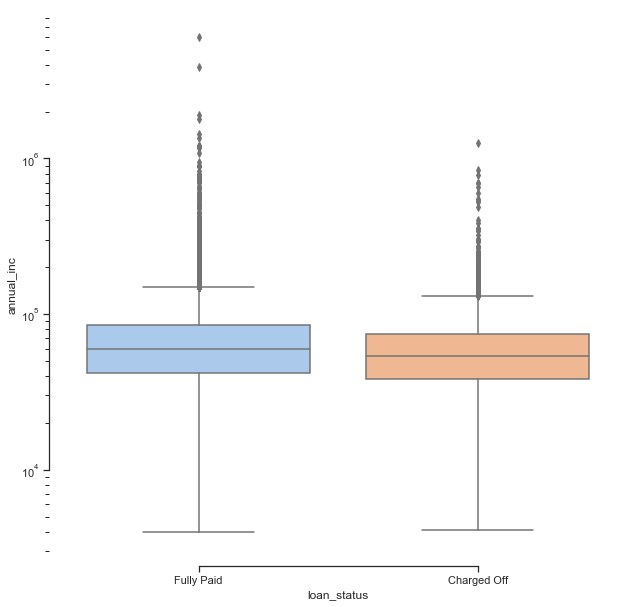

In [248]:
plt.figure(figsize=(10,10)) 
sns.set(style="ticks", palette="pastel")
# Draw a nested boxplot to show bills by day and time
ax = sns.boxplot(x="loan_status", y="annual_inc",data=loans)
ax.set(yscale="log")
sns.despine(offset=10, trim=True)

#### Fully paid have higher annual income at the higher end outliers compared to charged off
#### Fully paid loans have slightly higher mean, 25th, 50th, 75th percentiles of annual income compared to charged off loans.
#### Doing a annual_inc against subgrade to check for any trends.

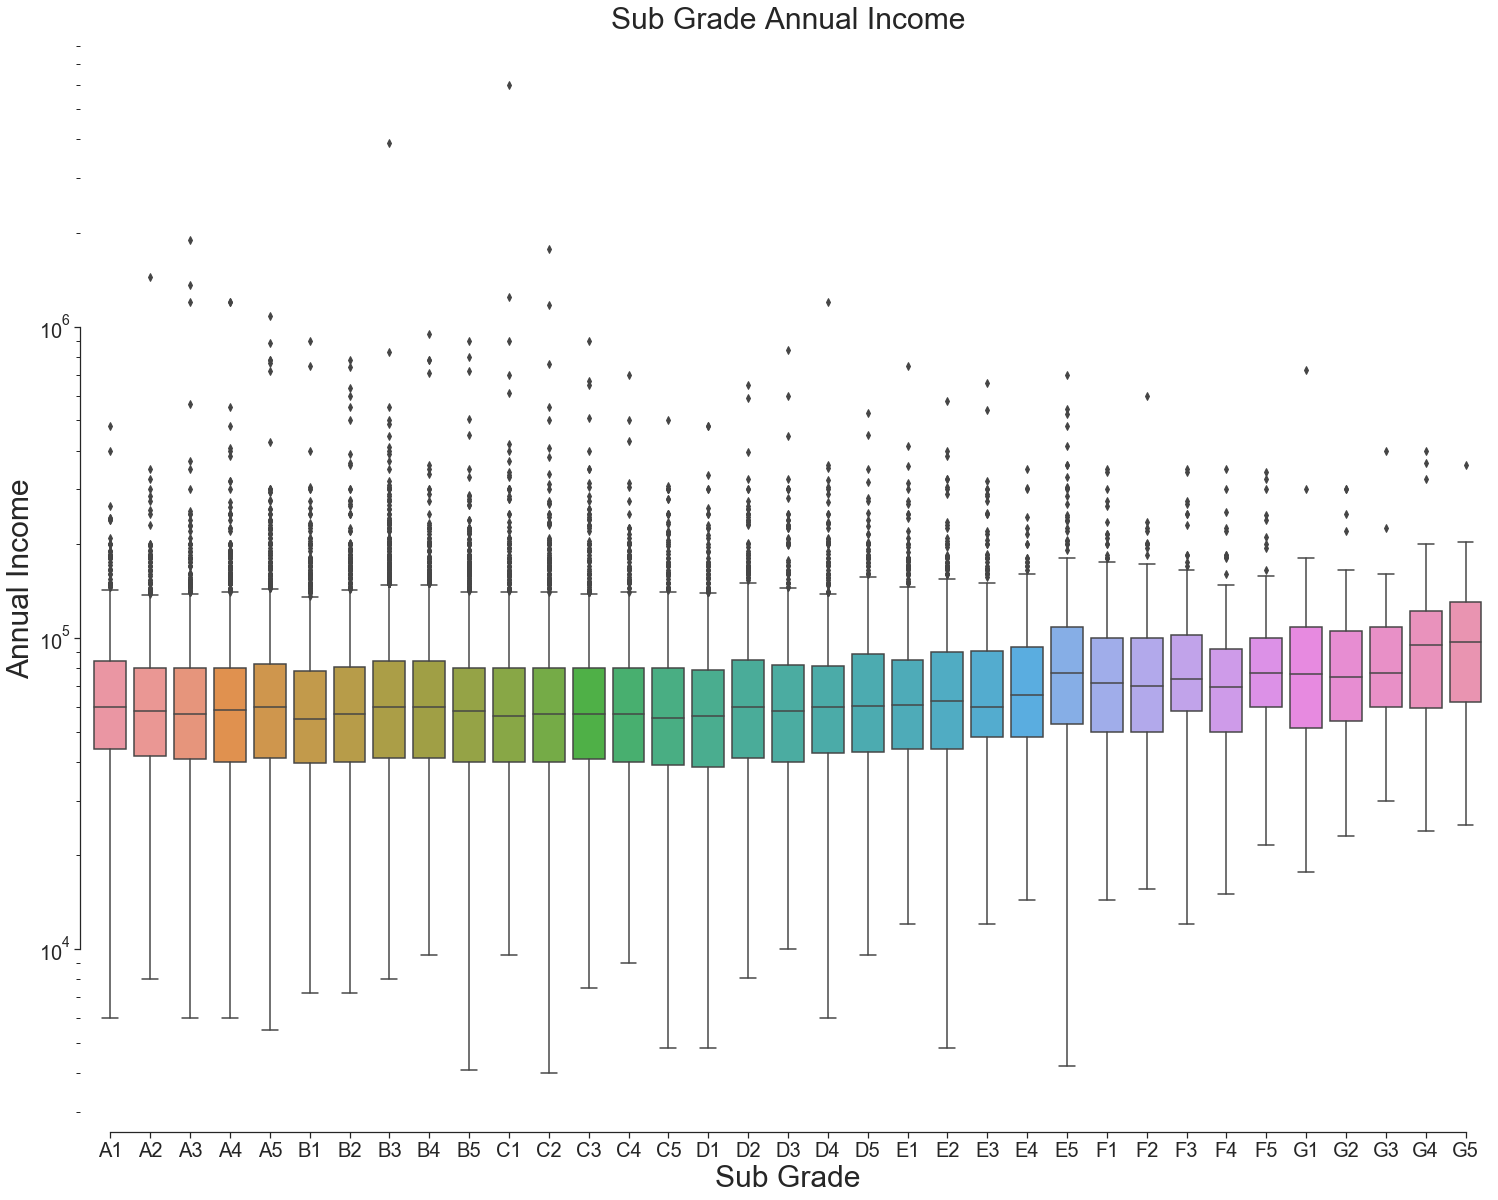

In [249]:
plt.figure(figsize=(25,20)) 
sns.set(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
b =sns.boxplot(x="sub_grade", y="annual_inc",data=loans,order=['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'])
b.set(yscale="log")
b.axes.set_title("Sub Grade Annual Income",fontsize=30)
b.set_xlabel("Sub Grade",fontsize=30)
b.set_ylabel("Annual Income",fontsize=30)
b.tick_params(labelsize=20)

sns.despine(offset=10, trim=True)

#### Not much difference in the spread of annual income across all grades.

In [250]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

loans['annual_inc_bin'] = loans['annual_inc'].apply(lambda x: annual_income(x))

In [251]:
loans['annual_inc_bin'].value_counts()

medium       17151
low          14361
high          3893
very high     1442
Name: annual_inc_bin, dtype: int64

In [252]:
defaulters_gb_grd_annual_inc_bin_sum = loans.groupby(['grade', 'annual_inc_bin'])['is_defaulter'].sum().to_frame("count")
gb_grd_annual_inc_bin_sum = loans.groupby(['grade', 'annual_inc_bin']).id.count().to_frame("count")
defaulters_gb_grd_annual_inc_bin_sum['percent_to_total'] = round(defaulters_gb_grd_annual_inc_bin_sum.divide(gb_grd_annual_inc_bin_sum, fill_value=0)*100,2)
defaulters_gb_grd_annual_inc_bin_sum.reset_index(inplace=True)
defaulters_gb_grd_annual_inc_bin_sum.head()

grade annual_inc_bin  count  percent_to_total
0     A           high   30.0              3.07
1     A            low  307.0              8.21
2     A         medium  211.0              4.66
3     A      very high    4.0              1.44
4     B           high   79.0              7.18

Text(28.73352243923611, 0.5, '% to Total of defaulters')

<Figure size 3600x1152 with 0 Axes>

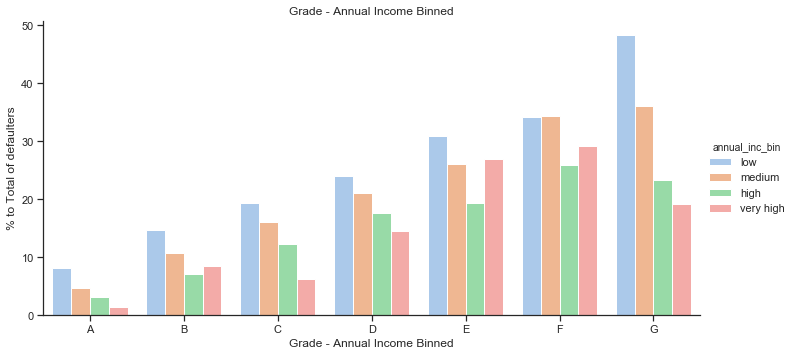

In [253]:
plt.figure(figsize=(50,16)) 
ax = sns.catplot(x="grade",y="percent_to_total",hue="annual_inc_bin",hue_order=['low','medium','high','very high'],data=defaulters_gb_grd_annual_inc_bin_sum,kind="bar",aspect=2)
plt.title('Grade - Annual Income Binned')
plt.xlabel('Grade - Annual Income Binned')
plt.ylabel('% to Total of defaulters')

#### Here we see a clear trend per grade, with higher annual income bins having lower percantage of defaulters compared to lower annual income bins.

In [254]:
defaulters_gb_annual_inc_bin_sum = loans.groupby(['annual_inc_bin'])['is_defaulter'].sum().to_frame("count")
gb_annual_inc_bin_sum = loans.groupby(['annual_inc_bin']).id.count().to_frame("count")
defaulters_gb_annual_inc_bin_sum['percent_to_total'] = round(defaulters_gb_annual_inc_bin_sum.divide(gb_annual_inc_bin_sum, fill_value=0)*100,2)
defaulters_gb_annual_inc_bin_sum.reset_index(inplace=True)
defaulters_gb_annual_inc_bin_sum.head()

annual_inc_bin   count  percent_to_total
0           high   414.0             10.63
1            low  2392.0             16.66
2         medium  2318.0             13.52
3      very high   157.0             10.89

Text(12.085, 0.5, '% to Total of defaulters')

<Figure size 3600x1152 with 0 Axes>

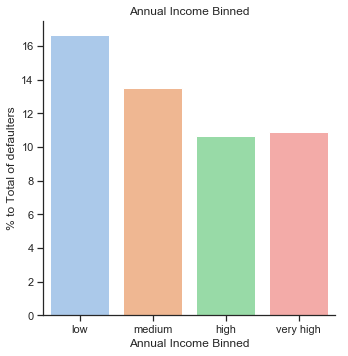

In [255]:
plt.figure(figsize=(50,16)) 
ax = sns.catplot(x="annual_inc_bin",y="percent_to_total",order=['low','medium','high','very high'],data=defaulters_gb_annual_inc_bin_sum,kind="bar")
plt.title('Annual Income Binned')
plt.xlabel('Annual Income Binned')
plt.ylabel('% to Total of defaulters')

#### Same holds true for overall trend of annual icome bins with higher annual income bins having lower % of defaulters compared to lower annual income bins.

## 7.issue_d

#### Issue Year and Issue Month to % of defaulters depicted through a heat map

In [256]:
loans['issue_date'] = loans.issue_d.apply(lambda x: pd.to_datetime(x.strip(),format='%b-%y'))
loans['issue_month'] = loans['issue_date'].dt.month
loans['issue_year'] = loans['issue_date'].dt.year

In [257]:
year_month_total = pd.pivot_table(loans, values='id', index='issue_year', columns='issue_month', aggfunc='count',fill_value=0)
year_month_total

issue_month    1     2     3     4     5     6     7     8     9     10    11  \
issue_year                                                                      
2007            0     0     0     0     0     0     0     2     0     1     2   
2008            6     7   121   155    69    66    83    70    32    96   184   
2009          239   260   276   290   319   356   374   407   447   545   602   
2010          585   605   718   806   894   996  1092  1058  1058  1086  1096   
2011         1336  1239  1402  1505  1554  1675  1674  1751  1837  1863  1971   

issue_month    12  
issue_year         
2007            2  
2008          223  
2009          598  
2010         1220  
2011         1994

In [258]:
year_month_total_defaulters = pd.pivot_table(loans, values='is_defaulter', index='issue_year', columns='issue_month', aggfunc='sum',fill_value=0)
year_month_total_defaulters

issue_month   1    2    3    4    5    6    7    8    9    10   11   12
issue_year                                                             
2007           0    0    0    0    0    0    0    1    0    1    0    0
2008           2    2   18   27   10    7   17    6    5   15   31   33
2009          28   34   31   40   42   43   47   39   57   87   83   62
2010          75   56   66   74  117  155  136  140  170  152  135  135
2011         176  151  202  215  275  255  262  262  292  290  314  408

In [259]:
type(year_month_total_defaulters)

pandas.core.frame.DataFrame

In [260]:
year_month_percent_to_total_defaulters = (year_month_total_defaulters.divide(year_month_total,fill_value=0)*100).round(2)

In [261]:
year_month_percent_to_total_defaulters.fillna(0,inplace=True)

In [262]:
year_month_percent_to_total_defaulters

issue_month     1      2      3      4      5      6      7      8      9   \
issue_year                                                                   
2007          0.00   0.00   0.00   0.00   0.00   0.00   0.00  50.00   0.00   
2008         33.33  28.57  14.88  17.42  14.49  10.61  20.48   8.57  15.62   
2009         11.72  13.08  11.23  13.79  13.17  12.08  12.57   9.58  12.75   
2010         12.82   9.26   9.19   9.18  13.09  15.56  12.45  13.23  16.07   
2011         13.17  12.19  14.41  14.29  17.70  15.22  15.65  14.96  15.90   

issue_month      10     11     12  
issue_year                         
2007         100.00   0.00   0.00  
2008          15.62  16.85  14.80  
2009          15.96  13.79  10.37  
2010          14.00  12.32  11.07  
2011          15.57  15.93  20.46

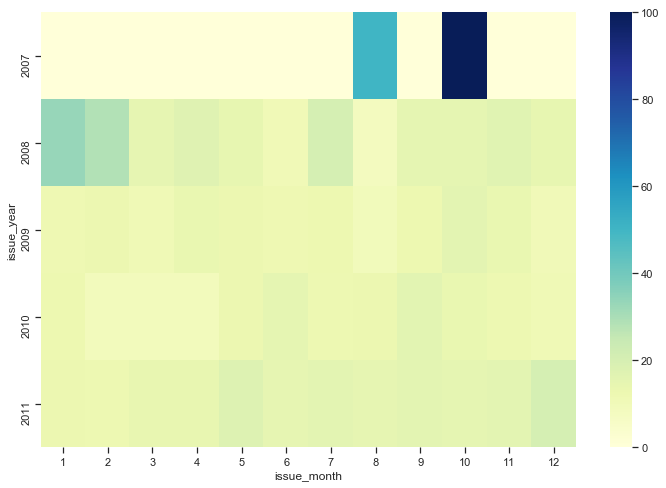

In [263]:
# figure size
plt.figure(figsize=(12, 8))

# heatmap with a color map of choice
sns.heatmap(year_month_percent_to_total_defaulters, cmap="YlGnBu")
plt.show()

#### Issue date month wise the % of defaulters is approx between10% to 20% of total with ony jan and feb of 2008 and Aug and Oct of 2007 having higher defaulter %.
#### But when we look closely at underlying data, those months have 1 out of total 2 loans as defaulters and 2 out of total 6 loans as defaulters. Years 2007 and 2008 have very less loan entries.

## 8. earliest_cr_line
#### The month the borrower's earliest reported credit line was opened.
#### Earlist credit line Year and Month to % of defaulters depicted through a heat map

In [264]:
loans['earliest_cr_line_date'] = loans.issue_d.apply(lambda x: pd.to_datetime(x.strip(),format='%b-%y'))
loans['earliest_cr_line_month'] = loans['earliest_cr_line_date'].dt.month
loans['earliest_cr_line_year'] = loans['earliest_cr_line_date'].dt.year

In [265]:
year_month_total_ecl = pd.pivot_table(loans, values='id', index='earliest_cr_line_year', columns='earliest_cr_line_month', aggfunc='count',fill_value=0)
year_month_total_ecl

earliest_cr_line_month    1     2     3     4     5     6     7     8     9   \
earliest_cr_line_year                                                          
2007                       0     0     0     0     0     0     0     2     0   
2008                       6     7   121   155    69    66    83    70    32   
2009                     239   260   276   290   319   356   374   407   447   
2010                     585   605   718   806   894   996  1092  1058  1058   
2011                    1336  1239  1402  1505  1554  1675  1674  1751  1837   

earliest_cr_line_month    10    11    12  
earliest_cr_line_year                     
2007                       1     2     2  
2008                      96   184   223  
2009                     545   602   598  
2010                    1086  1096  1220  
2011                    1863  1971  1994

In [266]:
year_month_total_defaulters_ecl = pd.pivot_table(loans, values='is_defaulter', index='earliest_cr_line_year', columns='earliest_cr_line_month', aggfunc='sum',fill_value=0)
year_month_total_defaulters_ecl

earliest_cr_line_month   1    2    3    4    5    6    7    8    9    10   11  \
earliest_cr_line_year                                                           
2007                      0    0    0    0    0    0    0    1    0    1    0   
2008                      2    2   18   27   10    7   17    6    5   15   31   
2009                     28   34   31   40   42   43   47   39   57   87   83   
2010                     75   56   66   74  117  155  136  140  170  152  135   
2011                    176  151  202  215  275  255  262  262  292  290  314   

earliest_cr_line_month   12  
earliest_cr_line_year        
2007                      0  
2008                     33  
2009                     62  
2010                    135  
2011                    408

In [267]:
year_month_percent_to_total_defaulters_ecl = (year_month_total_defaulters_ecl.divide(year_month_total_ecl,fill_value=0)*100).round(2)
year_month_percent_to_total_defaulters_ecl.fillna(0,inplace=True)
year_month_percent_to_total_defaulters_ecl

earliest_cr_line_month     1      2      3      4      5      6      7   \
earliest_cr_line_year                                                     
2007                     0.00   0.00   0.00   0.00   0.00   0.00   0.00   
2008                    33.33  28.57  14.88  17.42  14.49  10.61  20.48   
2009                    11.72  13.08  11.23  13.79  13.17  12.08  12.57   
2010                    12.82   9.26   9.19   9.18  13.09  15.56  12.45   
2011                    13.17  12.19  14.41  14.29  17.70  15.22  15.65   

earliest_cr_line_month     8      9       10     11     12  
earliest_cr_line_year                                       
2007                    50.00   0.00  100.00   0.00   0.00  
2008                     8.57  15.62   15.62  16.85  14.80  
2009                     9.58  12.75   15.96  13.79  10.37  
2010                    13.23  16.07   14.00  12.32  11.07  
2011                    14.96  15.90   15.57  15.93  20.46

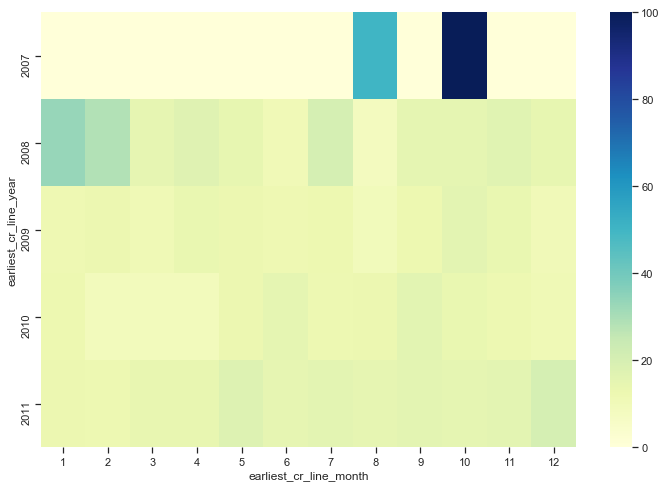

In [268]:
# figure size
plt.figure(figsize=(12, 8))

# heatmap with a color map of choice
sns.heatmap(year_month_percent_to_total_defaulters_ecl, cmap="YlGnBu")
plt.show()

#### Here as well the defaulter % varies between 8 to 20 % with higher % in 2007 and 2008 due to 1 out of total 2 or 2 out of total 6 loans getting defaulted for certain months.
#### earliest_cr_line is not a driver variable.

## 9. dti
#### dti(A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.) and loan Status

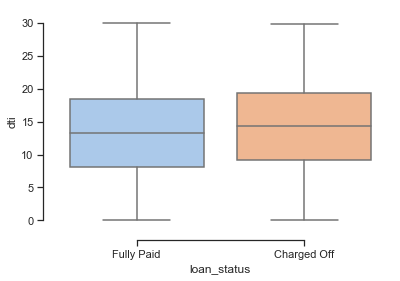

In [269]:
sns.set(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="loan_status", y="dti",data=loans)
sns.despine(offset=10, trim=True)

#### Fully paid loans have slightly lower dti at least the 25th, 50th and 75th percentiles. This could be due to dti being the ratio of monthly loan payments to monthly income, a lower ratio would imply higher monthly income and lower loan installment,making it less likely to become a defaulter.

In [270]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

loans['dti_bin'] = loans['dti'].apply(lambda x: dti(x))

In [271]:
loans['dti_bin'].value_counts()

medium    17699
low       12220
high       6928
Name: dti_bin, dtype: int64

In [272]:
defaulters_gb_grd_dti_bin_sum = loans.groupby(['grade', 'dti_bin'])['is_defaulter'].sum().to_frame("count")
gb_grd_dti_bin_sum = loans.groupby(['grade', 'dti_bin']).id.count().to_frame("count")
defaulters_gb_grd_dti_bin_sum['percent_to_total'] = round(defaulters_gb_grd_dti_bin_sum.divide(gb_grd_dti_bin_sum, fill_value=0)*100,2)
defaulters_gb_grd_dti_bin_sum.reset_index(inplace=True)
defaulters_gb_grd_dti_bin_sum.head()

grade dti_bin  count  percent_to_total
0     A    high  112.0              7.60
1     A     low  198.0              4.98
2     A  medium  242.0              5.95
3     B    high  277.0             13.17
4     B     low  403.0             11.17

Text(28.3686056640625, 0.5, '% to Total of defaulters')

<Figure size 3600x1152 with 0 Axes>

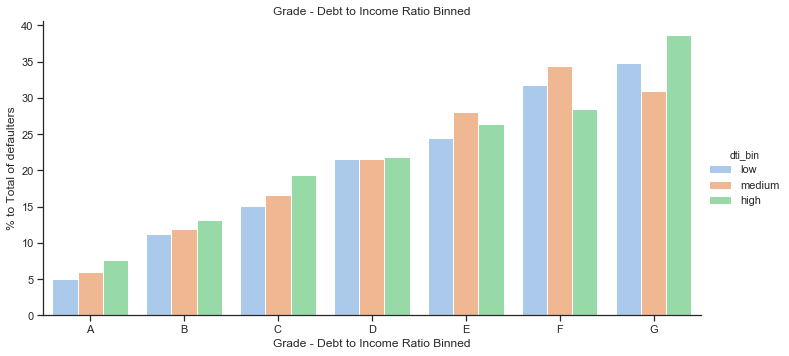

In [273]:
plt.figure(figsize=(50,16)) 
ax = sns.catplot(x="grade",y="percent_to_total",hue="dti_bin",hue_order=['low','medium','high'],data=defaulters_gb_grd_dti_bin_sum,kind="bar",aspect=2)
plt.title('Grade - Debt to Income Ratio Binned')
plt.xlabel('Grade - Debt to Income Ratio Binned')
plt.ylabel('% to Total of defaulters')

In [274]:
defaulters_gb_dti_bin_sum = loans.groupby(['dti_bin'])['is_defaulter'].sum().to_frame("count")
gb_dti_bin_sum = loans.groupby(['dti_bin']).id.count().to_frame("count")
defaulters_gb_dti_bin_sum['percent_to_total'] = round(defaulters_gb_dti_bin_sum.divide(gb_dti_bin_sum, fill_value=0)*100,2)
defaulters_gb_dti_bin_sum.reset_index(inplace=True)
defaulters_gb_dti_bin_sum.head()

dti_bin   count  percent_to_total
0    high  1130.0             16.31
1     low  1519.0             12.43
2  medium  2632.0             14.87

Text(12.085, 0.5, '% to Total of defaulters')

<Figure size 3600x1152 with 0 Axes>

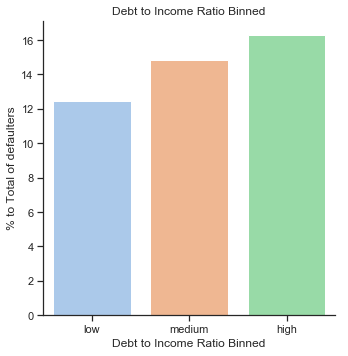

In [275]:
plt.figure(figsize=(50,16)) 
ax = sns.catplot(x="dti_bin",y="percent_to_total",order=['low','medium','high'],data=defaulters_gb_dti_bin_sum,kind="bar")
plt.title('Debt to Income Ratio Binned')
plt.xlabel('Debt to Income Ratio Binned')
plt.ylabel('% to Total of defaulters')

#### Again the bar graphs tell the same story, with high dti bins having higher no of defaulters compared to low dti bins.

## So as per the trends seen in the graphs that have been plotted, below is the consolidated analysis of all the variables so as to conclude whether they are driver variables or not:

#### Categorical Variables:

#### 1. pub_rec_bankruptcies
       With higher Publicly Recorded  Bankrupcies Defaulter percentage is showing an increasing trend both overall and across grades.

#### 2. verification_status 
        Overall verification_status is showing increasing Defaulter percentage trend from "Not Verified" to "Source Verified" to "Verified" verification_status.
        But across grades, this trend is not consistent.

#### 3. home_ownership
       Overall RENT and OTHER Home Ownership types have slightly higher defaulter % compared to the OWN and MORTGAGE.   
       But across grades there is no any consistant pattern.

#### 4. term
       With term it can be seen that 60 months term has higher % of defaulters compared to 36 months except for grade G. 
       This could be for obvious reasons that more no of months can cause more people to default their payments at the later stages.
       Overall also there is almost 15% difference in the percentage of defaulters in 36 months and 60 months terms with 60 months having more percentage of defaulters.

#### 5. emp_length
       emp_length does not have any increasing/decreasing defaulter % patterns overall or across grades.
       Even after binning into 4 categories of Fresher, Junior, Senior and Expert, defaulter percentages across all these categories overall and across grades do not show any consistent increase or decrease across grades or substancial increase/decrease between overall binned categories.

#### 6. Grade
       There is a clear increase in defaulter % (approx 30%) from grades A to G 

#### 7. SubGrade   
       Clearly % of defaulters to total is increasing from A1 to higher grades. The grades have been assigned as per Base Risk with increasing risk thus more % of defaulters from A1 to G5.
   
   If we look at the lending club page below which gives info on how these grades and subgrades are assigned, based on   FICO score, credit attributes, and other application data, model rank is calculated and thus grades and subgrades are assigned.
   
   https://www.lendingclub.com/foliofn/rateDetail.action
   
#### 8. addr_state
       The states do have varying defaulter percentages from 0 to approximately 22%.
       We see that some states like Nevada, Alaska, Tennessee have comparatively higher no of defaulters.

#### Continuous Variables:

#### 1. loan_amnt
       Even after Binning, there is no consistent increase/decrease in defaulter % for bins across grades from low to very high or not any comparative substancial increase/decrease of defaulter percentage overall for low, medium, high or very high loan amounts.

#### 2. funded_amnt
       Overall, high and very high Funded Amounts have higher defaulter % cmpared to low and medium funded amounts.
       But this pattern is not consistent across grades.

#### 3. funded_amnt_inv
       Overall, high and very high Funded Amounts Inv have higher defaulter % cmpared to low and medium funded amount inv.
       But again just like funded_amnt, this pattern is not consistent across grades.

#### 4. int_rate
       Fully paid loans have lower interest rates compared to Charged Off loans in terms of overall spread of data as seen in box plot.
       This due to grades A to G having increased risk, are assigned higher interest rate.
       It is very clear across grades and also overall that higher interest rates bins have higher percentage of defaulters.

#### 5. installment
       Charged Off have slightly higher installment spread as seen in box plot.
       This again is related to grade and sub_grade, with increasing trend of installment in all quantiles for investments with the move from A1 to G5 grades
       Overall higher installments have higher no of defaulters(approx 2 % increase in defaulter % from low, medium to high and very high binned installments), but when we check grade wise, there is no consistent trend.

#### 6. annual_inc
       Fully paid loans have slightly higher spread of annual income compared to charged off loans.
       There is not much difference in the spread of annual income across all grades.
       When binned, there is a clear trend per grade, with higher annual income bins having lower percentage of defaulters compared to lower annual income bins.
       Same holds true for overall trend of annual icome bins with higher annual income bins having lower % of defaulters compared to lower annual income bins.

#### 7. issue_d
       Issue date month wise the % of defaulters is approx between10% to 20% of total with ony jan and feb of 2008 and Aug and Oct of 2007 having higher defaulter %.
       But when we look closely at underlying data, those months have 1 out of total 2 loans as defaulters and 2 out of total 6 loans as defaulters. Years 2007 and 2008 have very less loan entries.

#### 8. earliest_cr_line
       Here as well the defaulter % varies between 8 to 20 % with higher % in 2007 and 2008 due to 1 out of total 2 or 2 out of total 6 loans getting defaulted for certain months.

#### 9. dti   
       Fully paid loans have slightly lower dti in terms of spread as seen in box plot. 
       This could be due to dti being the ratio of monthly loan payments to monthly income, a lower ratio would imply higher monthly income and lower loan installment,making it less likely to become a defaulter.  
       When binned, bar graphs tell the same story, with high dti bins having higher no of defaulters compared to low dti bins both overall and across grades.

#### Another way to quantify th effect of a categorical variable on default rate is to see 'how much does the default rate vary across the categories'. 

#### Lets see an example using annual_inc as the categorical variable.

In [276]:
# variation of default rate across annual_inc
loans.groupby('annual_inc_bin').is_defaulter.mean().sort_values(ascending=False)

annual_inc_bin
low          0.166562
medium       0.135152
very high    0.108877
high         0.106345
Name: is_defaulter, dtype: float64

In [277]:
# one can write a function which takes in a categorical variable and computed the average 
# default rate across the categories
# It can also compute the 'difference between the highest and the lowest default rate' across the 
# categories, which is a decent metric indicating the effect of the varaible on default radef diff_rate(cat_var):

def diff_rate(cat_var):
    default_rates = loans.groupby(cat_var).is_defaulter.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

default_rates, diff = diff_rate('annual_inc_bin')
print(default_rates) 
print(diff)


annual_inc_bin
low          0.17
medium       0.14
very high    0.11
high         0.11
Name: is_defaulter, dtype: float64
0.06


Thus, there is a 6% increase in default rate as you go from high to low annual income. We can compute this difference for all the variables and roughly identify the ones that affect default rate the most.

In [278]:
loans_categorical = loans.loc[:, ['term','grade','sub_grade','home_ownership','verification_status','purpose','addr_state','pub_rec_bankruptcies','loan_amnt_bin','funded_amnt_bin','funded_amnt_inv_bin','int_rate_bin','installment_bin','annual_inc_bin','dti_bin','emp_length_bin']]
loans_categorical['is_defaulter'] = loans['is_defaulter']

#### Now, for each variable, we can compute the incremental diff in default rates

In [279]:
# storing the diff of default rates for each column in a dict
d = {key: round(diff_rate(key)[1]*100,2) for key in loans_categorical.columns if key != 'is_defaulter'}
print(d)

{'term': 14.0, 'grade': 28.0, 'sub_grade': 45.0, 'home_ownership': 5.0, 'verification_status': 4.0, 'purpose': 17.0, 'addr_state': 22.0, 'pub_rec_bankruptcies': 0.0, 'loan_amnt_bin': 8.0, 'funded_amnt_bin': 7.0, 'funded_amnt_inv_bin': 6.0, 'int_rate_bin': 20.0, 'installment_bin': 3.0, 'annual_inc_bin': 6.0, 'dti_bin': 4.0, 'emp_length_bin': 2.0}
